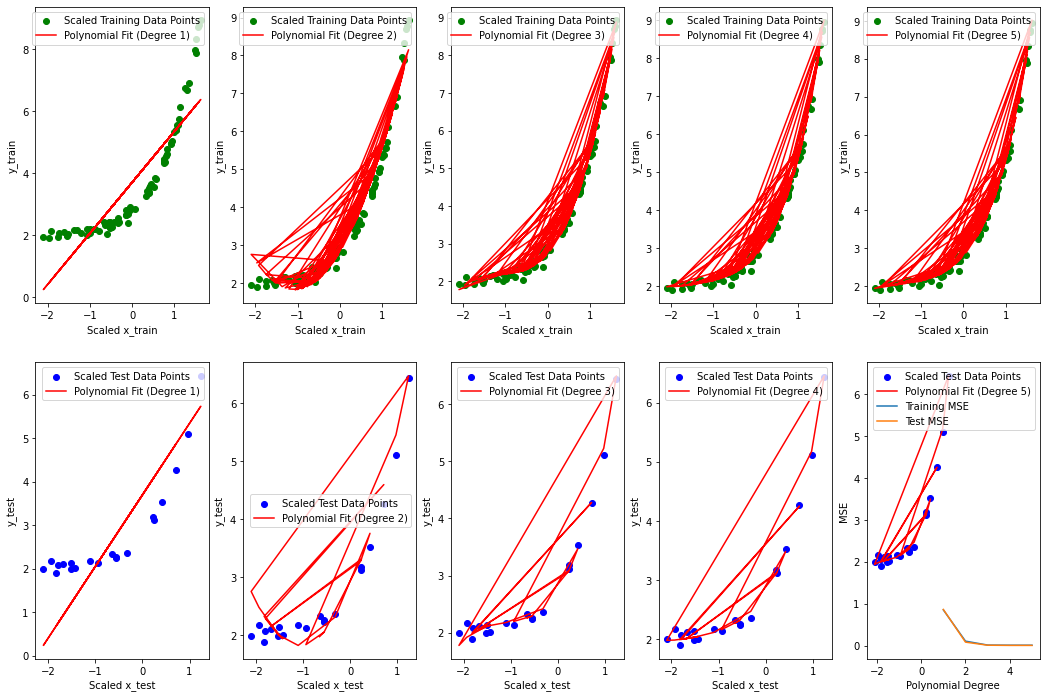

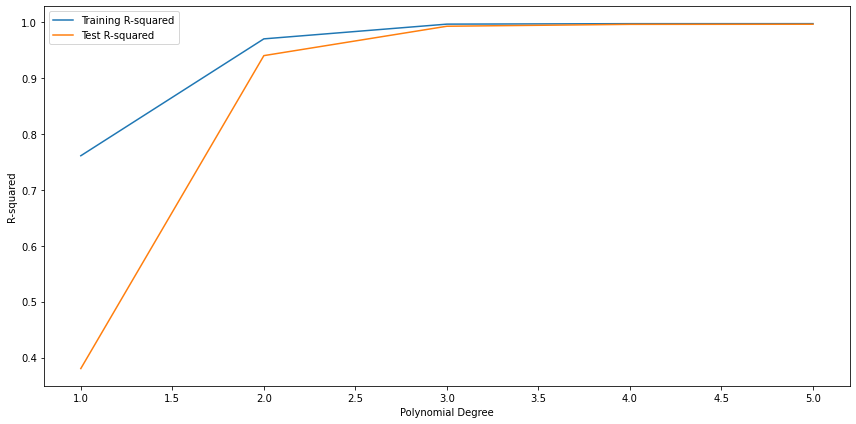

In [50]:
#One-polynomial model, OLS Method. For testing purposes:

#Comment: I have used the brute force Matrix Inversion theta = np.linalg.inv(X.T @ X) @ X.T @ y,
#rather than the SVD. The matrix inversion is applied to the design matrix X, where (X.T @ X)
#calculates the matrix product of the transpose and X. The product is called the inner product matrix.
# Then, it calculates the inverse of the inner product matrix, and then calculates the matrix product
# of the transpose of X. The overall point is to find the coefficients
#that best matches the data, in this case using the OLS method.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data for x and y
x = np.random.rand(100, 1)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, 1)

# Split the data into training and test sets (80% training, 20% testing)
# The code doesn't use a fixed number of data points, 
# but it uses np.arange because it adds additional fleixibility. To keep it reproducible,
# it uses a fixed seed: random_state=42 for the random number generator ensures
# that the random process generates the same results each time the code is run. Of course,
# the same is used for the other regression methods. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Create a list to store X_range arrays for each degree
X_range_list = []

plt.figure(figsize=(18, 12))

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)
    
    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))
    
    X_range = np.ones((100, 1))
    for d in range(1, degree + 1):
        X_range = np.hstack((X_range, x_range.reshape(-1, 1)**d))
    
    X_range_list.append(X_range)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Plot the polynomial fit for each degree
    plt.subplot(2, 5, degree)
    plt.scatter(x_train_scaled, y_train, label='Scaled Training Data Points', color='green')
    y_pred_train = model.predict(X_train)  # Predict using the current model
    plt.plot(x_train_scaled, y_pred_train, color='red', label=f'Polynomial Fit (Degree {degree})')
    plt.xlabel('Scaled x_train')
    plt.ylabel('y_train')
    plt.legend()

    plt.subplot(2, 5, degree + 5)
    plt.scatter(x_test_scaled, y_test, label='Scaled Test Data Points', color='blue')
    y_pred_test = model.predict(X_test)  # Predict using the current model
    plt.plot(x_test_scaled, y_pred_test, color='red', label=f'Polynomial Fit (Degree {degree})')
    plt.xlabel('Scaled x_test')
    plt.ylabel('y_test')
    plt.legend()

# MSE plot
plt.subplot(2, 5, 10)
plt.plot(degree_range, mse_train_list, label='Training MSE')
plt.plot(degree_range, mse_test_list, label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()

# R-squared plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(degree_range, r2_train_list, label='Training R-squared')
plt.plot(degree_range, r2_test_list, label='Test R-squared')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()
#Here, the data is split to ensure that the model generalizes well to new, unseen data.
#The data is scaled using "StandardScaler". Scaling is done to ensure that all input features
#are on a similar scale. This can help improve the convergence and performance and ensures that 
#no single feature dominates the learning process due to its larger magnitude, which can lead
#to slower convergence or biased results. It can also make coefficients more interpretable in linear models.
#However, scaling may not be necessary for all algorithms, and it may also make coefficients less 
#interpretable in other models. #the choice to split the data into training and test sets with an 80-20 ratio and to scale
#the data using StandardScaler in this particular case was made to ensure that the polynomial regression model is trained
#effectively, generalizes well to unseen data, and is numerically stable during optimization. These choices are common
#best practices in machine learning when working with regression models and can lead to more robust and interpretable results.
#Then, we test both the R2 and MSE for Training and Test data. The above code creates a loop that iterates over different 
#polynomial degrees and fits the polynomial model for each degree. Additionally, you can store the MSE and R-squared values for
#both the training and test sets for each polynomial degree.

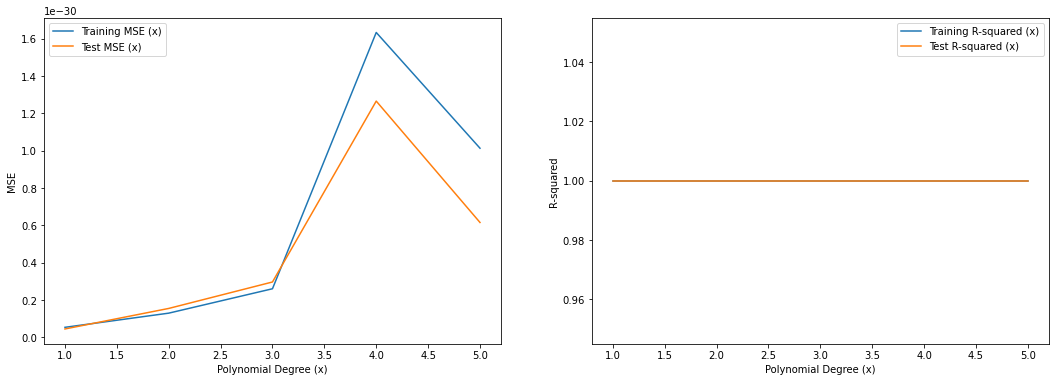

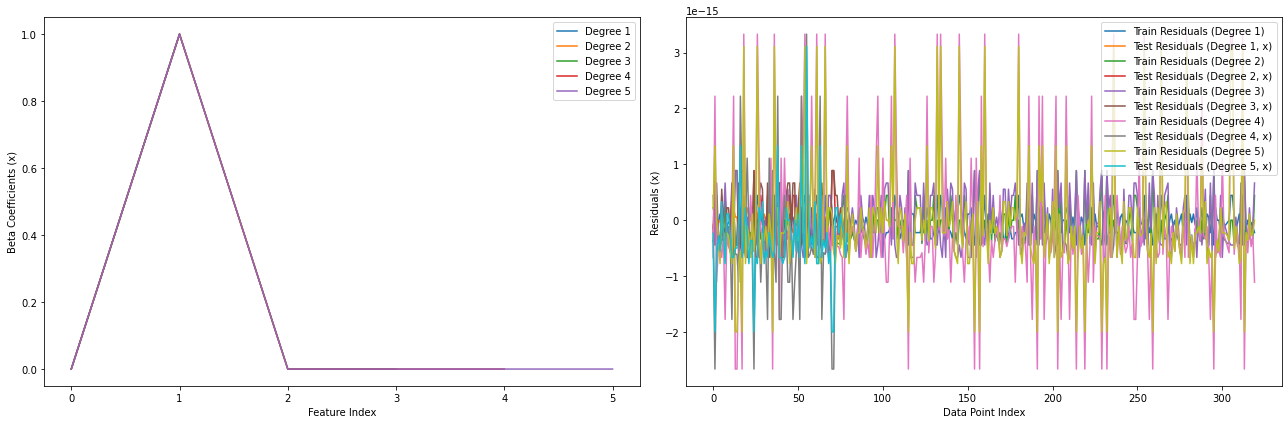

In [148]:
#Two-polynomial model with the given Franke function, OLS Method:

#Comment: Here, it is used the brute force Matrix Inversion theta = np.linalg.inv(X.T @ X) @ X.T @ y,
#rather than the SVD. The matrix inversion is applied to the design matrix X, where (X.T @ X)
#calculates the matrix product of the transpose and X. The product is called the inner product matrix.
# Then, it calculates the inverse of the inner product matrix, and then calculates the matrix product
# of the transpose of X, with the aim of finding the coefficients
#that best matches the data, in this case using the OLS method.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y)

# Flatten the 2D arrays for data splitting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list_x = []
mse_test_list_x = []
r2_train_list_x = []
r2_test_list_x = []
mse_train_list_y = []
mse_test_list_y = []
r2_train_list_y = []
r2_test_list_y = []
mse_train_list_z = []
mse_test_list_z = []
r2_train_list_z = []
r2_test_list_z = []

# Initialize lists to store residuals
residuals_train_x = []
residuals_test_x = []
residuals_train_y = []
residuals_test_y = []
residuals_train_z = []
residuals_test_z = []

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train_x = np.ones_like(x_train_scaled)
    X_test_x = np.ones_like(x_test_scaled)
    X_train_y = np.ones_like(x_train_scaled)
    X_test_y = np.ones_like(x_test_scaled)
    X_train_z = np.ones_like(x_train_scaled)
    X_test_z = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train_x = np.hstack((X_train_x, x_train_scaled**d))
        X_test_x = np.hstack((X_test_x, x_test_scaled**d))
        X_train_y = np.hstack((X_train_y, y_train_scaled**d))
        X_test_y = np.hstack((X_test_y, y_test_scaled**d))
        X_train_z = np.hstack((X_train_z, z_train_scaled**d))
        X_test_z = np.hstack((X_test_z, z_test_scaled**d))

    model_x = LinearRegression()
    model_y = LinearRegression()
    model_z = LinearRegression()
    model_x.fit(X_train_x, x_train_scaled)
    model_y.fit(X_train_y, y_train_scaled)
    model_z.fit(X_train_z, z_train_scaled)

    x_train_pred_x = model_x.predict(X_train_x)
    x_test_pred_x = model_x.predict(X_test_x)
    y_train_pred_y = model_y.predict(X_train_y)
    y_test_pred_y = model_y.predict(X_test_y)
    z_train_pred_z = model_z.predict(X_train_z)
    z_test_pred_z = model_z.predict(X_test_z)

    # Calculate residuals
    residuals_train_x.append(x_train_scaled - x_train_pred_x)
    residuals_test_x.append(x_test_scaled - x_test_pred_x)
    residuals_train_y.append(y_train_scaled - y_train_pred_y)
    residuals_test_y.append(y_test_scaled - y_test_pred_y)
    residuals_train_z.append(z_train_scaled - z_train_pred_z)
    residuals_test_z.append(z_test_scaled - z_test_pred_z)

    mse_train_x = mean_squared_error(x_train_scaled, x_train_pred_x)
    mse_test_x = mean_squared_error(x_test_scaled, x_test_pred_x)
    r2_train_x = r2_score(x_train_scaled, x_train_pred_x)
    r2_test_x = r2_score(x_test_scaled, x_test_pred_x)
    
    mse_train_y = mean_squared_error(y_train_scaled, y_train_pred_y)
    mse_test_y = mean_squared_error(y_test_scaled, y_test_pred_y)
    r2_train_y = r2_score(y_train_scaled, y_train_pred_y)
    r2_test_y = r2_score(y_test_scaled, y_test_pred_y)
    
    mse_train_z = mean_squared_error(z_train_scaled, z_train_pred_z)
    mse_test_z = mean_squared_error(z_test_scaled, z_test_pred_z)
    r2_train_z = r2_score(z_train_scaled, z_train_pred_z)
    r2_test_z = r2_score(z_test_scaled, z_test_pred_z)

    mse_train_list_x.append(mse_train_x)
    mse_test_list_x.append(mse_test_x)
    r2_train_list_x.append(r2_train_x)
    r2_test_list_x.append(r2_test_x)
    
    mse_train_list_y.append(mse_train_y)
    mse_test_list_y.append(mse_test_y)
    r2_train_list_y.append(r2_train_y)
    r2_test_list_y.append(r2_test_y)
    
    mse_train_list_z.append(mse_train_z)
    mse_test_list_z.append(mse_test_z)
    r2_train_list_z.append(r2_train_z)
    r2_test_list_z.append(r2_test_z)

# MSE plot for x, y, and z
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(degree_range, mse_train_list_x, label='Training MSE (x)')
plt.plot(degree_range, mse_test_list_x, label='Test MSE (x)')
plt.xlabel('Polynomial Degree (x)')
plt.ylabel('MSE')
plt.legend()
plt.savefig('MSEOLS12.png', bbox_inches='tight')

plt.subplot(1, 2, 2)
plt.plot(degree_range, r2_train_list_x, label='Training R-squared (x)')
plt.plot(degree_range, r2_test_list_x, label='Test R-squared (x)')
plt.xlabel('Polynomial Degree (x)')
plt.ylabel('R-squared')
plt.legend()
plt.savefig('R2OLS.png')

beta_coefficients_x = []

# Create subplots for the beta coefficients
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train_x = np.ones_like(x_train_scaled)
    for d in range(1, degree + 1):
        X_train_x = np.hstack((X_train_x, x_train_scaled**d))

    model_x = LinearRegression()
    model_x.fit(X_train_x, x_train_scaled)
    
    beta_coeff_x = model_x.coef_.ravel()  # Extract beta coefficients
    beta_coefficients_x.append(beta_coeff_x)

# Plot beta coefficients for each degree
for i in range(len(degree_range)):
    plt.plot(range(len(beta_coefficients_x[i])), beta_coefficients_x[i], label=f'Degree {degree_range[i]}')
plt.xlabel('Feature Index')
plt.ylabel('Beta Coefficients (x)')
plt.legend()

# Residuals plot for x
plt.subplot(1, 2, 2)
for i, degree in enumerate(degree_range):
    plt.plot(range(len(residuals_train_x[i])), residuals_train_x[i], label=f'Train Residuals (Degree {degree})')
    plt.plot(range(len(residuals_test_x[i])), residuals_test_x[i], label=f'Test Residuals (Degree {degree}, x)')
plt.xlabel('Data Point Index')
plt.ylabel('Residuals (x)')
plt.legend()

plt.tight_layout()
plt.show()

#Here, the data is split to ensure that the model generalizes well to new, unseen data.
#The data is scaled using "StandardScaler". Scaling is done to ensure that all input features
#are on a similar scale. This can help improve the convergence and performance and ensures that 
#no single feature dominates the learning process due to its larger magnitude, which can lead
#to slower convergence or biased results. It can also make coefficients more interpretable in linear models.
#However, scaling may not be necessary for all algorithms, and it may also make coefficients less 
#interpretable in other models. #the choice to split the data into training and test sets with an 80-20 ratio and to scale
#the data using StandardScaler in this particular case was made to ensure that the polynomial regression model is trained
#effectively, generalizes well to unseen data, and is numerically stable during optimization. These choices are common
#best practices in machine learning when working with regression models and can lead to more robust and interpretable results.
#Results: The data plots which measure the scaled x_train data versus y_train for varying data degrees,
#yield results with high variance and bias. This is also true for y_test. Measuring the scaled x_train data versus
#the z_train data yields a result that has somewhat lower variance and bias, but there is still quite a lot. The same holds
#for z_test.

#I then tested the R2 and MSE for Training and Test data. The above code creates a loop that iterates over different 
#polynomial degrees and fits the polynomial model for each degree. Additionally, you can store the MSE and R-squared values for
#both the training and test sets for each polynomial degree. The Franke Function is a non-linear, multi-modal function with peaks,
#valleys, and varying degree of curvature. The Franke Function is expected to perform worse especially for higher-degree
#polynomials than the single-variable polynomial, and overfitting might occur as the model tries to capture the noise in the data.

#The R-squared stays stable at 1, indicating overfitting, as this is the perfect score. 
#The MSE performs well for degrees 1, 2 and 3, but has a massive spike from degree 3 to 4,
#and the 4th- and 5th-degree polynomials give high MSE scores.

#The error term residuals are very evenly distributed around 0 (They take on extremely small values). 


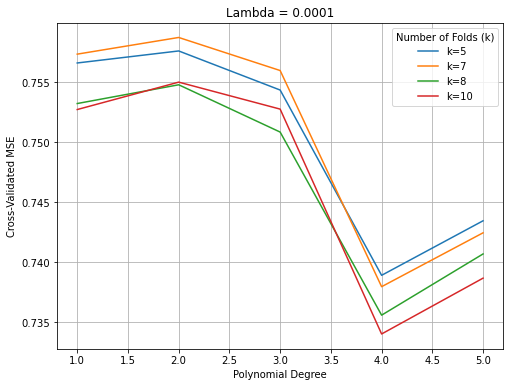

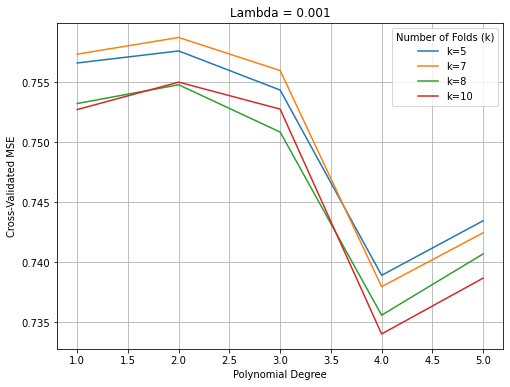

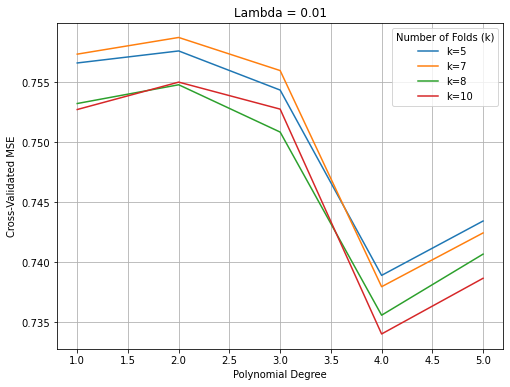

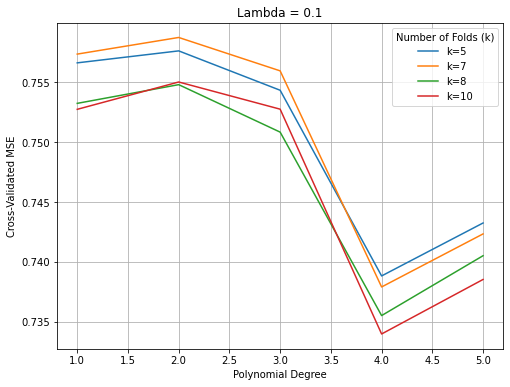

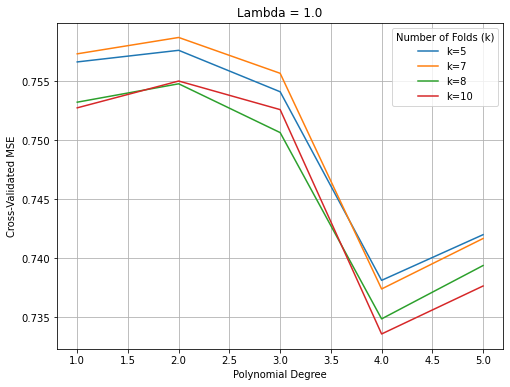

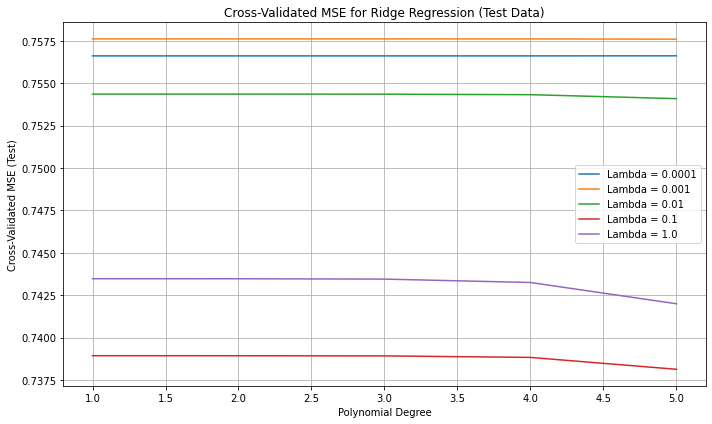

In [106]:
#Ridge regression for Franke function with Cross-validation across different. no of folds:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y)

# Flatten the 2D arrays for data splitting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
degree_range = range(1, 6)

# Define a range of k values to test
k_values = [5, 7, 8, 10]

# Initialize a dictionary to store MSE values for each k and lambda combination
mse_dict = {k: {lambda_val: [] for lambda_val in lambda_values} for k in k_values}

# Perform Ridge regression with cross-validation for different k values
for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for degree in degree_range:
        for lambda_val in lambda_values:
            # Create polynomial features for the current degree
            X_train = np.ones_like(x_train_scaled)
            X_test = np.ones_like(x_test_scaled)
            
            for d in range(1, degree + 1):
                X_train = np.hstack((X_train, x_train_scaled**d))
                X_test = np.hstack((X_test, x_test_scaled**d))
            
            # Fit Ridge regression model with the current lambda using k-fold cross-validation
            ridge = Ridge(alpha=lambda_val)
            mse_test_cv = -cross_val_score(ridge, X_train, z_train_scaled, cv=cv, scoring='neg_mean_squared_error').mean()
            
            # Store the MSE for the current combination of k and lambda
            mse_dict[k][lambda_val].append(mse_test_cv)

# Plot the cross-validated MSE as a function of k for each lambda
for lambda_val in lambda_values:
    plt.figure(figsize=(8, 6))
    for k in k_values:
        mse_values = mse_dict[k][lambda_val]
        plt.plot(degree_range, mse_values, label=f'k={k}')
    
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Cross-Validated MSE')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend(title='Number of Folds (k)')
    plt.grid(True)
    
def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    mse = mean_squared_error(y, y_pred)
    return -mse

# Perform Ridge regression with cross-validation
for degree in degree_range:
    for lambda_val in lambda_values:
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Ridge regression model with the current lambda using 5-fold cross-validation
        ridge = Ridge(alpha=lambda_val)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_test_cv = -cross_val_score(ridge, X_train, z_train_scaled, cv=cv, scoring=custom_scoring_function).mean()

        mse_test_cv_list.append(mse_test_cv)

# Plot cross-validated MSE as a function of polynomial degree
plt.figure(figsize=(10, 6))
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, mse_test_cv_list[i * len(degree_range):(i + 1) * len(degree_range)], label=f'Lambda = {lambda_val}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validated MSE (Test)')
plt.title('Cross-Validated MSE for Ridge Regression (Test Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Here, I've used the validation set to find the optimal parameters for this particular set of parameters/data. 
#There is a looping over the lambda-parameters, and then it finds where the training block begins
#And where the test block begins. #cross_val_score return an array containing the estimation.
#There is a small correlation between polynomial degree and decrease in MSE for 3 of the lambda values.
#The 5th degree polynomial for the lambda=0.1 returns the best MSE, and is the optimal parameter for Ridge.

#And then I've run across numbers of k-folds to understand whether the results are independent of number of folds, k.
#The results are not completely independent of the no. of folds. I see that as the no. of folds increase,
#the MSE becomes closer to 0. So the optimal parameter is actually the 5th-degree polynomial for lambda=0.1
#with 10-folds cross-validation.

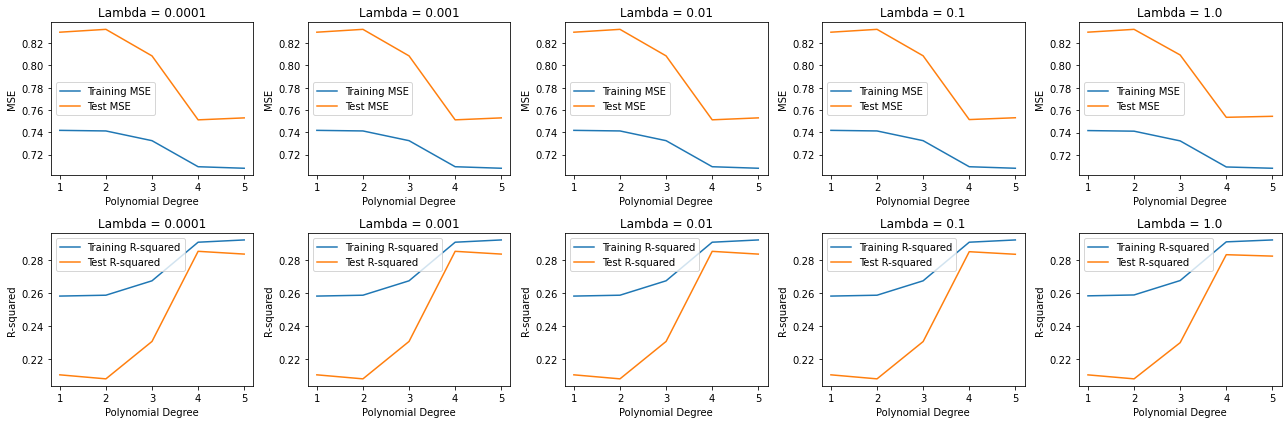

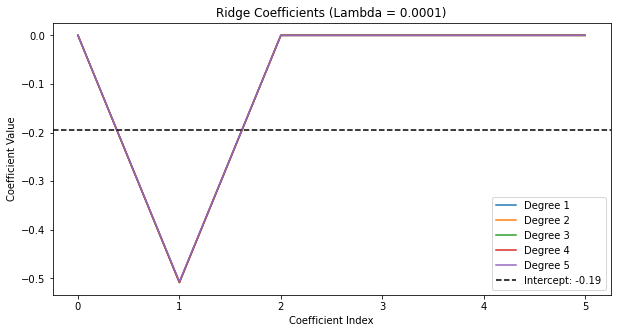

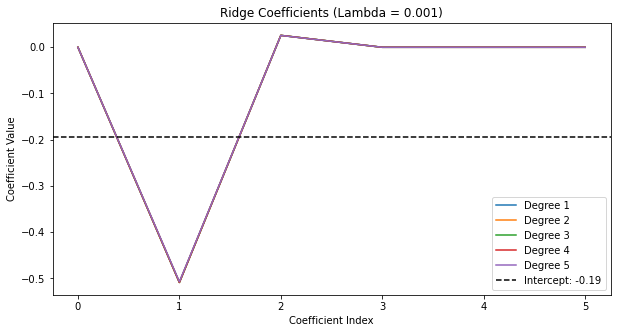

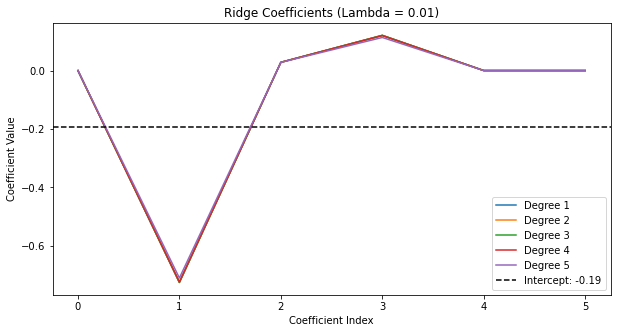

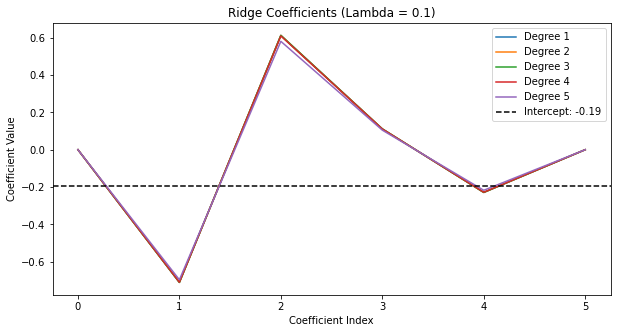

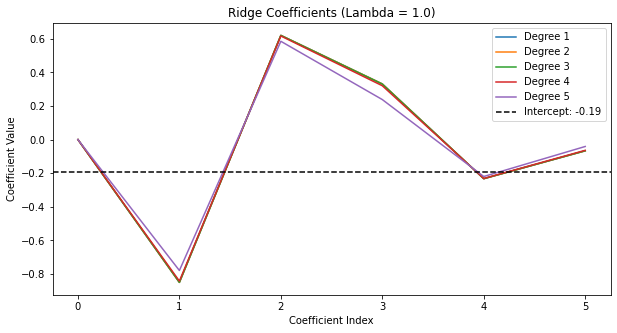

    Lambda  Degree                                      Train Z-score  \
0   0.0001       1  [[0.5524266477289703], [-4.08143566238508], [0...   
1   0.0001       2  [[0.5524209296331528], [-4.081428347783877], [...   
2   0.0001       3  [[0.5523637504439587], [-4.081355204034737], [...   
3   0.0001       4  [[0.5517921353948635], [-4.080623992761108], [...   
4   0.0001       5  [[0.5460936141531018], [-4.073334431400564], [...   
5   0.0010       1  [[0.5821537079175102], [-3.9836586955884545], ...   
6   0.0010       2  [[0.5821478169250319], [-3.983651911390929], [...   
7   0.0010       3  [[0.5820889088592855], [-3.9835840714174835], ...   
8   0.0010       4  [[0.5815000140462803], [-3.982905871805334], [...   
9   0.0010       5  [[0.5756295910423106], [-3.9761438293415927], ...   
10  0.0100       1  [[0.8155143622473927], [-3.7888008358321117], ...   
11  0.0100       2  [[0.8154930585439913], [-3.7888018491263957], ...   
12  0.0100       3  [[0.8152800711523367], [-3.7888

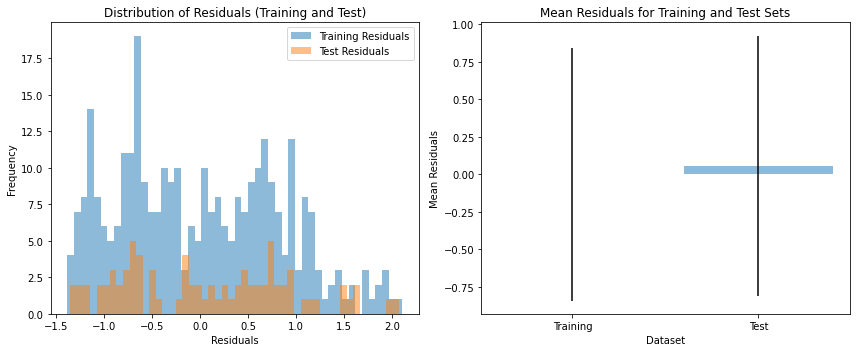

In [167]:
#Ridge Regression with lambda values 0.0001, 0.001, 0.01, 0.1, 1:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y)

# Flatten the 2D arrays for data splitting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

# Initialize lists to store MSE and R-squared values for different degrees and lambda values
degree_range = range(1, 6)
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]

mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
beta_coefficients_list = []

# Fit Ridge regression models for different lambda values and polynomial degrees
for degree in degree_range:
    for i, lambda_val in enumerate(lambda_values):
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Ridge regression model with the current lambda
        model = Ridge(alpha=lambda_val)
        model.fit(X_train, z_train_scaled)

        z_train_pred = model.predict(X_train)
        z_test_pred = model.predict(X_test)

        mse_train = mean_squared_error(z_train_scaled, z_train_pred)
        mse_test = mean_squared_error(z_test_scaled, z_test_pred)
        r2_train = r2_score(z_train_scaled, z_train_pred)
        r2_test = r2_score(z_test_scaled, z_test_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)

        # Store beta coefficients
        beta_coefficients_list.append(model.coef_.flatten())

# MSE and R-squared plots
plt.figure(figsize=(18, 6))
for i, lambda_val in enumerate(lambda_values):
    plt.subplot(2, len(lambda_values), i + 1)
    plt.plot(degree_range, mse_train_list[i::len(lambda_values)], label='Training MSE')
    plt.plot(degree_range, mse_test_list[i::len(lambda_values)], label='Test MSE')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend()

    plt.savefig('mse_plot_ridge.png')
    
    plt.subplot(2, len(lambda_values), len(lambda_values) + i + 1)
    plt.plot(degree_range, r2_train_list[i::len(lambda_values)], label='Training R-squared')
    plt.plot(degree_range, r2_test_list[i::len(lambda_values)], label='Test R-squared')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R-squared')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend()

plt.tight_layout()

# Plot beta coefficients and intercepts
for i, lambda_val in enumerate(lambda_values):
    # Create a list to store beta coefficients for each degree
    beta_degree_list = []

    for degree in degree_range:
        # Extract beta coefficients for the current degree and lambda value (Ridge coefficients)
        beta_coeffs_ridge = beta_coefficients_list[i * len(degree_range) + degree - 1]

        # Ensure that each beta_coeffs_ridge array has length 6 (coefficients up to degree 5)
        beta_coeffs_ridge = np.pad(beta_coeffs_ridge, (0, max(0, 5 - len(beta_coeffs_ridge) + 1)), 'constant')

        # Plot beta coefficients for the current lambda and degree
        beta_degree_list.append(beta_coeffs_ridge)

    # Merge polynomial plots for the same lambda value
    plt.figure(figsize=(10, 5))
    for degree in degree_range:
        plt.plot(range(len(beta_degree_list[0])), beta_degree_list[degree - 1], label=f'Degree {degree}')

    # Plot intercept as a horizontal line
    intercept = model.intercept_[0]
    plt.axhline(y=intercept, color='black', linestyle='--', label=f'Intercept: {intercept:.2f}')
    plt.title(f'Ridge Coefficients (Lambda = {lambda_val})')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.show()

# Calculate and analyze error terms (Residuals)
residuals_train = z_train_scaled - z_train_pred
residuals_test = z_test_scaled - z_test_pred

# Calculate mean and standard deviation of residuals
mean_residuals_train = np.mean(residuals_train)
std_residuals_train = np.std(residuals_train)

mean_residuals_test = np.mean(residuals_test)
std_residuals_test = np.std(residuals_test)

# Plot histograms of residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=50, label='Training Residuals', alpha=0.5)
plt.hist(residuals_test, bins=50, label='Test Residuals', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Residuals (Training and Test)')

plt.subplot(1, 2, 2)
plt.bar(['Training', 'Test'], [mean_residuals_train, mean_residuals_test], yerr=[std_residuals_train, std_residuals_test], alpha=0.5)
plt.xlabel('Dataset')
plt.ylabel('Mean Residuals')
plt.title('Mean Residuals for Training and Test Sets')

z_train_mean = np.mean(z_train)
z_train_std = np.std(z_train)
z_train_zscore = (z_train - z_train_mean) / z_train_std

z_test_mean = np.mean(z_test)
z_test_std = np.std(z_test)
z_test_zscore = (z_test - z_test_mean) / z_test_std

# Initialize lists to store Z-score related information
zscore_train_list = []
zscore_test_list = []

# Fit Ridge regression models for different lambda values and polynomial degrees
for degree in degree_range:
    for i, lambda_val in enumerate(lambda_values):
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Ridge regression model with the current lambda
        model = Ridge(alpha=lambda_val)
        model.fit(X_train, z_train_scaled)

        z_train_pred = model.predict(X_train)
        z_test_pred = model.predict(X_test)

        # Calculate Z-scores for predicted values
        z_train_pred_zscore = (z_train_pred - z_train_mean) / z_train_std
        z_test_pred_zscore = (z_test_pred - z_test_mean) / z_test_std

        # Store Z-scores
        zscore_train_list.append(z_train_pred_zscore)
        zscore_test_list.append(z_test_pred_zscore)

# Create a DataFrame for Z-scores
zscore_df = pd.DataFrame()
zscore_df['Lambda'] = [lambda_val for lambda_val in lambda_values for _ in degree_range]
zscore_df['Degree'] = [degree for _ in lambda_values for degree in degree_range]
zscore_df['Train Z-score'] = [zscore_train_list[i].tolist() for i in range(len(zscore_train_list))]
zscore_df['Test Z-score'] = [zscore_test_list[i].tolist() for i in range(len(zscore_test_list))]

# Print the Z-score DataFrame
print(zscore_df)

plt.tight_layout()
plt.show()

        # Ensure that each beta_coeffs_ridge array has length 6 (coefficients
#Explanation of lambda: Lambda indicates the strength of the regularization term (It does not exist in OLS)

#What am I looking for? Training MSE to increase as lambda increases. Larger lambda creates stronger regularization, 
#preventing the model from fitting the data too closely. The model becomes less likely to overfit, resulting in a higher
#training MSE. Training R2 to decrease as lambda increases. A decrease indicates that the model is becoming less able
#to explain the variance in the training data, expected with stronger regularization.
#Expect test MSE to initially decrease as lambda increases. This is because mild regularization can improve generalization by
#reducing overfitting. However, if you increase lambda too much, test MSE may start to increase again because the model becomes
#too biased.

#Results: Test and training MSE differ at degree 5 for all values of lambda, it is close to 0 for degrees 1 and 2 across all values of lambda.
#Test and training MSE is close to 0.5 for lambda = 0.001 and lambda = 0.01 for the third and fourth degree polynomial. 
#It is between 0.5 and 1.0 for the lambda = 0.0001 and 0.1, so somewhat higher.
#Test MSE is close to 2 for the 5th degree polynomial for all values of lambda except lambda=1, so the Ridge regression gives a 
#worse MSE than the OLS method here.
#Training MSE is between 1.5 and 2 for the 5th degree polynomial for all values of lambda except lambda=1, also here the 
#Ridge regression gives a worse MSE than the OLS method.
#The test and training MSE is extremely small and close to 0 for all polynomial degrees when lambda=1, so this specific value 
#of the parameter lambda gives the best MSE score we have gotten thus far, across polynomial degrees.
#This shows that the MSE doesn't strictly increase or decrease as the lambda increases, but it actually diverges.
#However, the MSE in all cases increase as the polynomial degree increases.


#Comparison: At the low degree polynomials, the MSE was low with the OLS method, and performed better than Ridge regression
#(For polynomial degrees 3,4 and 5).
#As the polynomial degree increased from 3 to 4 and 5, MSE increased, meaning the model responded worse to an increase
#in model complexity, as expected. (The difference/bias between predicted values and mean value grew). 
#With the Ridge regression, the MSE decreased for degrees 4 and 5, across all values of the regularization term, meaning;
#in this case, the regularization term had no effect on the MSE. (The difference/bias between predicted values and 
#mean value). With the Ridge regression, the drop in MSE for larger polynomial degrees was more significant for the test
#than the training data. Because the test data contains fewer data points(predicted values), fewer data points responded
#less well to an increase in model complexity. For Degrees 4 and 5, the Ridge regression performed better than OLS. 
#Another difference from the OLS method was that the test data performed better than the training data with OLS,
#but here training performed better than test, which is expected because of not enough data points for the OLS.

#The R2 score is between 8 and 10 when lambda=0.001 and =0.1, which is very far off from the perfect score 1.
#The R2 score is between 0 and -2 when lambda=0.0001 and =0.01, so like the MSE, the R2 score doesnt strictly increase or decrease
#as lambda gets larger, but it actually diverges. However, interestingly, it diverges in a different manner than the MSE, meaning
#it diverges for different lambda-values than the MSE. 
#Divergent R2 scores for different lambda values, suggests you need to carefully select an appropriate lambda so that the
#correct amount of regularization is applied.
#It thus indicates an improper balancing. 
#Divergent R2 scores indicate that the model's flexibility varies significantly with different lambda values. 
#Some lambda values may produce models (polynomial fits, using Ridge regression line) that are too rigid and unable to 
#capture the underlying patterns in the data (high bias),
#while others may produce models (polynomial fits) that fit the training data too closely and fail to generalize well to
#unseen data (high variance).
#For lambda=1, the R2-score is extremely close to 1 for all values of lambda.
#For all values of lambda, the R2-score decreases as the polynomial degree increases. 
#The negative R2-scores for lambda = 0.0001 and =0.01 indicates performance that is worse than a model 
#that uses the mean as a prediction. 
#A very high R-squared (R2) score indicates that a large proportion of the variance in the dependent variable
#is explained by the independent variables (the variables used to make predictions). It might also mean overfitting.

#Comparison: The R2 scores gives a better result than the OLS, which just gave a score of 1 (this is impossible). This
#likely happened due to overfitting. The Ridge regression might have handled the problem of overfitting. 


#The Beta-coefficients show the beta coefficient for the scaled z-values.
#We see that the |B1 is extremely close to 1 across all lambda-values.
#We see that the |B0, |B2 etc. is extremely close to 0 for all lambda-values, 
#and the polynomial degrees all perform very equally. However, there is a small difference 
#of the Beta-coefficients as lambda increases, and we see for instance that the higher the degree
#of the polynomial, the slightly closer to 0 the coefficients get as lambda increases.
#The regularization itself drives the coefficients further away from zero, and the less complex the polynomial,
#the further away from 0 it drives them. 
#We have removed the mean from each feature, in order to get an intercept that is plotted along with the Beta coefficients.

#In the Ridge regression, here the residuals have the highest frequencies at -1.25 and -0.75 approximately, but
#they are evenly spread out from -1.5 to 1.0. The model is here predicting values that are from -1.5 to 1.0 more than
#or less than the actual values. The distribution of residuals are quite evenly spread out around 0. 


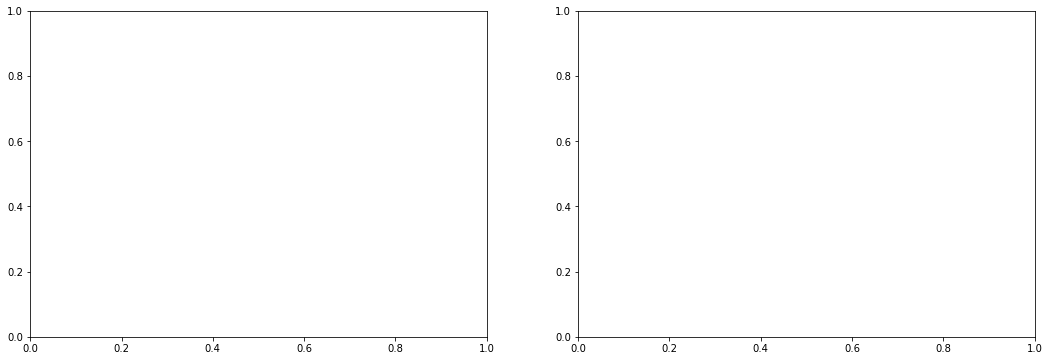

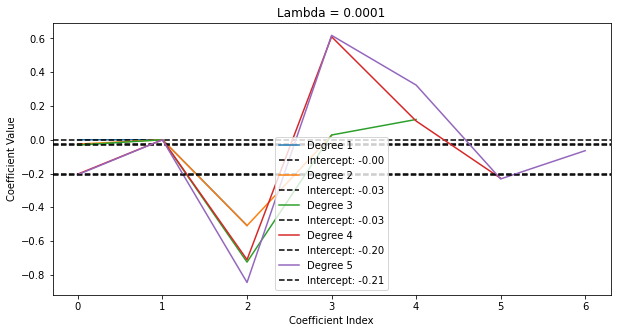

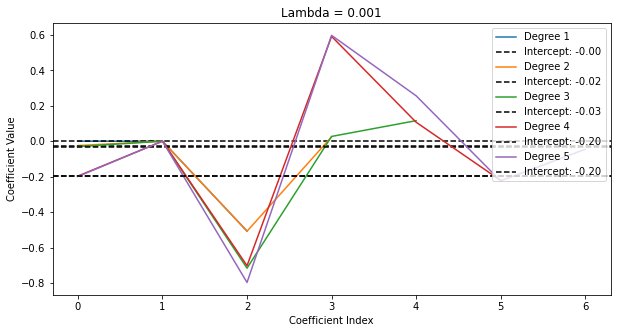

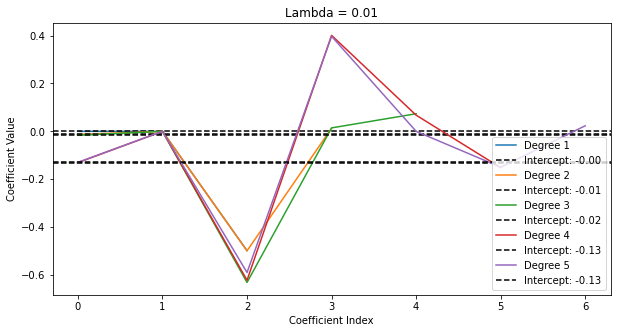

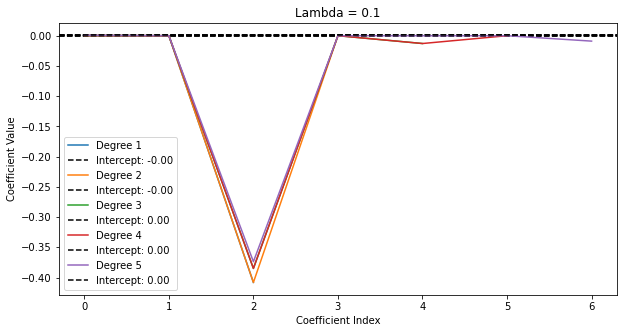

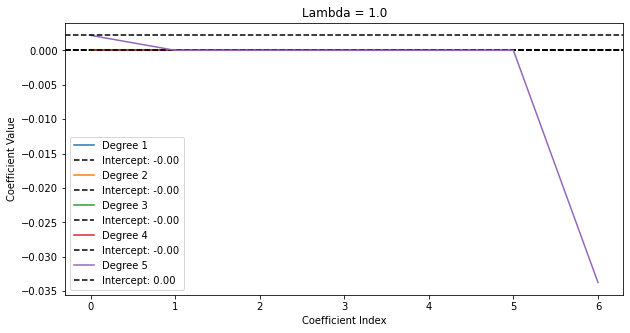

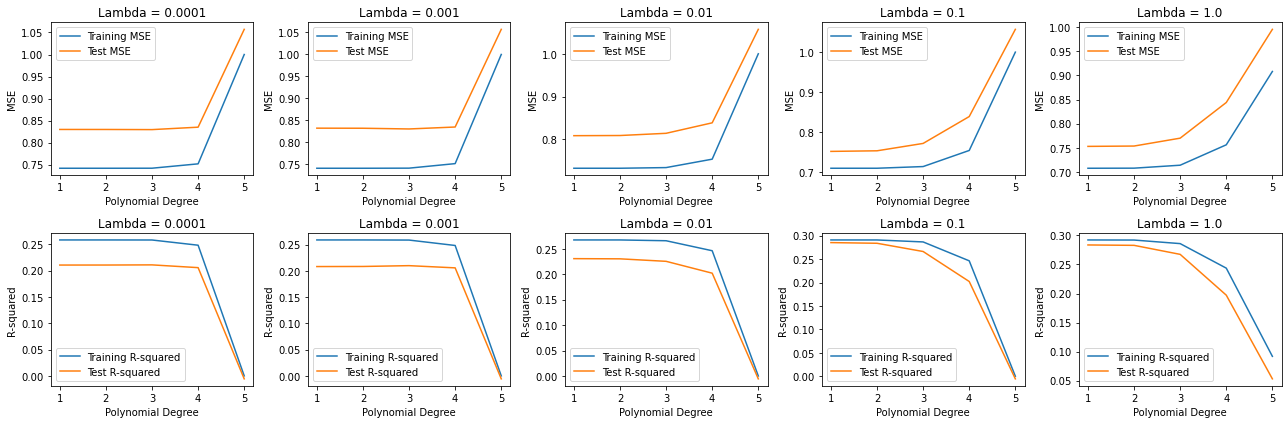

    Lambda  Degree  \
0   0.0001       1   
1   0.0001       2   
2   0.0001       3   
3   0.0001       4   
4   0.0001       5   
5   0.0010       1   
6   0.0010       2   
7   0.0010       3   
8   0.0010       4   
9   0.0010       5   
10  0.0100       1   
11  0.0100       2   
12  0.0100       3   
13  0.0100       4   
14  0.0100       5   
15  0.1000       1   
16  0.1000       2   
17  0.1000       3   
18  0.1000       4   
19  0.1000       5   
20  1.0000       1   
21  1.0000       2   
22  1.0000       3   
23  1.0000       4   
24  1.0000       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                           

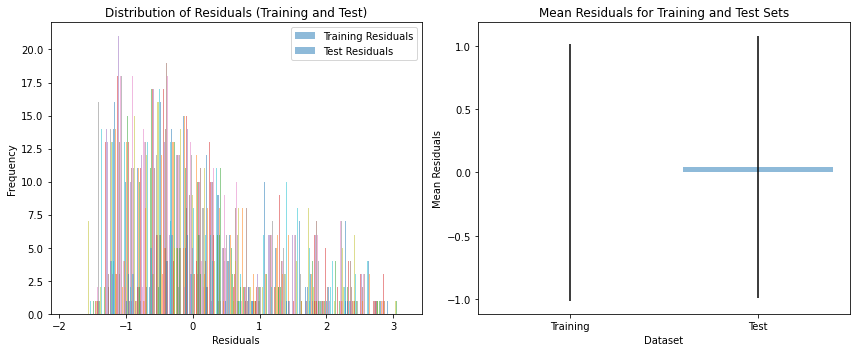

In [168]:
#The Lasso Regression with Franke Function:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y)

# Flatten the 2D arrays for data splitting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler for both input features and target variable
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler_x.transform(x_test.reshape(-1, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
z_train_scaled = scaler_y.fit_transform(z_train.reshape(-1, 1))  # Also standardize the target variable
z_test_scaled = scaler_y.transform(z_test.reshape(-1, 1))

# Initialize lists to store MSE and R-squared values for different degrees and lambda values (Lasso parameter)
degree_range = range(1, 6)
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]

mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
beta_coefficients_list = []

# Create subplots for the scaled training and test data
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.5)

for i, lambda_val in enumerate(lambda_values):
    for degree in degree_range:
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Lasso regression model with the current lambda
        model = Lasso(alpha=lambda_val)
        model.fit(X_train, z_train_scaled)

        z_train_pred = model.predict(X_train)
        z_test_pred = model.predict(X_test)

        mse_train = mean_squared_error(z_train_scaled, z_train_pred)
        mse_test = mean_squared_error(z_test_scaled, z_test_pred)
        r2_train = r2_score(z_train_scaled, z_train_pred)
        r2_test = r2_score(z_test_scaled, z_test_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)

        # Store beta coefficients, including the intercept
        beta_coeffs = np.insert(model.coef_, 0, model.intercept_)
        beta_coefficients_list.append(beta_coeffs)

# Plot beta coefficients for each lambda value and degree
for i, lambda_val in enumerate(lambda_values):
    plt.figure(figsize=(10, 5))
    for degree in degree_range:
        beta_coeffs_lasso = beta_coefficients_list[i * len(degree_range) + degree - 1]
        intercept = beta_coeffs_lasso[0]  # Intercept is at index 0
        plt.plot(range(len(beta_coeffs_lasso)), beta_coeffs_lasso, label=f'Degree {degree}')
        plt.axhline(y=intercept, color='black', linestyle='--', label=f'Intercept: {intercept:.2f}')
    plt.title(f'Lambda = {lambda_val}')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.show()

# MSE and R-squared plots
plt.figure(figsize=(18, 6))
for i, lambda_val in enumerate(lambda_values):
    plt.subplot(2, len(lambda_values), i + 1)
    plt.plot(degree_range, mse_train_list[i::len(lambda_values)], label='Training MSE')
    plt.plot(degree_range, mse_test_list[i::len(lambda_values)], label='Test MSE')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend()
    
    plt.savefig('mse_plot_ridge.png')

    plt.subplot(2, len(lambda_values), len(lambda_values) + i + 1)
    plt.plot(degree_range, r2_train_list[i::len(lambda_values)], label='Training R-squared')
    plt.plot(degree_range, r2_test_list[i::len(lambda_values)], label='Test R-squared')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R-squared')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate and analyze error terms
residuals_train = z_train_scaled - z_train_pred
residuals_test = z_test_scaled - z_test_pred

# Calculate mean and standard deviation of residuals
mean_residuals_train = np.mean(residuals_train)
std_residuals_train = np.std(residuals_train)

mean_residuals_test = np.mean(residuals_test)
std_residuals_test = np.std(residuals_test)

# Plot histograms of residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=50, label='Training Residuals', alpha=0.5)
plt.hist(residuals_test, bins=50, label='Test Residuals', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Residuals (Training and Test)')

plt.subplot(1, 2, 2)
plt.bar(['Training', 'Test'], [mean_residuals_train, mean_residuals_test], yerr=[std_residuals_train, std_residuals_test], alpha=0.5)
plt.xlabel('Dataset')
plt.ylabel('Mean Residuals')
plt.title('Mean Residuals for Training and Test Sets')

z_train_mean = np.mean(z_train)
z_train_std = np.std(z_train)
z_train_zscore = (z_train - z_train_mean) / z_train_std

z_test_mean = np.mean(z_test)
z_test_std = np.std(z_test)
z_test_zscore = (z_test - z_test_mean) / z_test_std
# Initialize lists to store Z-score related information for Lasso
zscore_train_list_lasso = []
zscore_test_list_lasso = []

# Fit Lasso regression models for different lambda values and polynomial degrees
for degree in degree_range:
    for i, lambda_val in enumerate(lambda_values):
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Lasso regression model with the current lambda
        model = Lasso(alpha=lambda_val)
        model.fit(X_train, z_train_scaled)

        z_train_pred = model.predict(X_train)
        z_test_pred = model.predict(X_test)

        # Calculate Z-scores for predicted values
        z_train_pred_zscore = (z_train_pred - z_train_mean) / z_train_std
        z_test_pred_zscore = (z_test_pred - z_test_mean) / z_test_std

        # Store Z-scores
        zscore_train_list_lasso.append(z_train_pred_zscore)
        zscore_test_list_lasso.append(z_test_pred_zscore)

# Create a DataFrame for Z-scores in Lasso
zscore_df_lasso = pd.DataFrame()
zscore_df_lasso['Lambda'] = [lambda_val for lambda_val in lambda_values for _ in degree_range]
zscore_df_lasso['Degree'] = [degree for _ in lambda_values for degree in degree_range]

# Round the test Z-scores to 4 decimal places
zscore_df_lasso['Test Z-scores'] = [", ".join(map(lambda x: f"{round(x, 4)}", zscore_test_list_lasso[i])) for i in range(len(zscore_test_list_lasso))]

# Print the Z-score DataFrame with all Z-scores for Lasso
pd.set_option('display.max_colwidth', None)
print(zscore_df_lasso)

plt.tight_layout()
plt.show()


#What do we want? As lambda values increase, MSE is expected to increase for both training and test sets. 
#Because higher lambda-values encourage the model to simplify and reduce the magnitude of its coefficients. 
#The model may become less flexible and less capable of fitting the training data well.
#As polynomial degrees grow larger, we expect MSE to decrease on the training set, as a higher-degree
#polynomial can fit the training data more closely. This may lead to overfitting, causing the test MSE 
#to increase as the model fails to generalize to unseen data.
#The interaction between lambda and polynomial degrees: Larger polynomial degrees can make the model
#more complex, potentially requiring higher lambda-values to prevent overfitting. So the relationship
#may involve a bias-variance tradeoff.

#R2 is expected to decrease for both training and test sets. Because lambda values induce more generalization,
#leading to a simpler model that may not explain as much variance in the data. As polynomial degrees grow
#larger, R2 may increase. But for the test set, we don't expect the same, so R2 decreasing is what we expect here.

#Results: Unlike the previous 2 models, the Test and Training MSE differ significantly for all values of lambda
#and all polynomial degrees. The Test and Training MSE both decrease, like in the Ridge regression at polynomial degrees 4 and 5.
#The exception is for lambda = 0.1. This particular value of the regularization term has a training and test MSE
#that doesn't decrease for the polynomial degrees 4 and 5. Instead it increases in the same way as for degrees 1, 2 and 3. 
#In Lasso, the degree 4 polynomial is the only one that has an increasing MSE across all degrees. 

#OLS gave the best MSE for degrees 1,2, and 3. For degree 4, the Ridge regression gave a marginally better MSE than Lasso,
#and for degree 5 Ridge regression was clearly the best performer. 

#The Test and Training R2 is also different from each other for all cases, where
#lambda=1.0 is the one containg the least difference. Interpretation:
#With Ridge regression, the R2 was increasing for each polynomial degree, and the same for all values of lambda.
#Here, the R2 is equal to the Ridge R2 for the 3 lowest lambda-values, with the R2 score lower than the Ridge scores
#for lambda values =0.1 and =1. Overall, the Ridge regression scored better than Lasso for R2. But the OLS method
#gave a perfect R2-score of 1, indicating overfitting. 
#This might be an indiciation of overfitting with the OLS method, but it depends on a few other measures.
#The Residuals were stable in the OLS case, which 
#is not an indication of overfitting. Another measure is Cross-Validation, 
#which I will do below. 

#The Beta-coefficient graphs tell us how they change as the regularization strength is varied. 
#There are 2 separate effects taking place here: 1. The regularization drives the coefficients away from 0.
#2. The Lasso regression itself drives them back to 0, and the higher the degree of the polynomial, the stronger it drives
#them towards 0.
#In the case of the 5th degree polynomial, the regularization is completely negated by the Lasso regression' driving
#the coefficients to 0.

#Here, the coefficient index 0 means |B0, coefficient index 1 means |B1, coefficient index 5 means |B5, etc.
#So, with the beta coefficient 0.0001, we are missing |B3, |B4 and |B5 entirely (These are 0).
#Interestingly, the beta coefficient |B1 is closest to 0 for the 4th degree polynomial with lambda=0.0001.
#The beta coefficient |B1 is closest to 0 for the 4th degree polynomial with lambda=0.001, whereas the
#beta coefficient |B2 is 
#So, the Lasso Regression drives the beta coefficients down to 0 for all values of lambda for the 5th degree polynomial.
#The 4th and 3rd degree polynomial are closest to 0 among the others, so we see that the higher the degree of the polynomial,
#the faster Lasso regression drives it to 0. 
#We also see that the regularization term strictly influences how fast the Lasso regression drives them towards 0.
#The larger the regularization term, the faster it drives them towards 0, so we have a positive relationship between
#regularization strength and polynomial degree in how fast the beta coefficients go down to 0.
#As with Ridge, the regularization itself drives the coefficients away from 0, but the Lasso drives them 
#stronger back to zero as the polynomial degree increases, and in a more significant manner than the Ridge regression.
#In a similar way as with Ridge, I have removed the mean from each feature and plotted the intercepts for each value
#of lambda along with the beta coefficients. The intercepts are all 0, suggesting that the regularization term is
#effectively setting the intercept to 0 during the model's training process because it believes that including 
#the intercept doesn't significantly improve model's performance. So here, the Lasso gives intercept=0 for all
#values of lambda. The choice between Lasso and Ridge (and the value of the intercept) might depend on 
#whether I want to prioritize model interpretability or prediction accuracy. 
#Lasso tends to produce sparse models with some coefficients set to exactly zero, which can make the model more interpretable.
#Ridge, on the other hand, tends to shrink coefficients towards zero but doesn't set them exactly to zero, which can lead to 
#better predictive performance. Evaluating the Franke Function near the origin can help answer whether Lasso or Ridge
#is the winner in this case. Evaluation yields:
#The first 2 terms of the Franke Function contain Gaussian terms with positive coefficients far away from the origin,
#whereas term 3 has a positive coefficient centered far away from the origin so they all have small influence close
#to the origin. The 4th term contains a negative Gaussian term with coefficient -0.2, far from the origin but with
#a negative impact on the function's value near the origin. This is the intercept we get with Ridge regression,
#so it may be appropriate in this case to say that the Ridge intercept is the better fit.

#Comparison with Ridge: The Model's ability to influence the size of the coefficients were weaker than Lasso.
#With Lasso, the coefficients became closer to 0 for the 4th and 5th degree polynomial with lambda=1,
#such that the method and regularization gave a better performance overall. 

#Comparison with OLS: The OLS model' gave a uniform modelling across all polynomial degrees, with |B1 being = 1,
#and all the others were equal to 0. While a beta coefficient equal to 0 can be useful, the OLS method does not
#seemingly provide the same flexibility in terms of deciding the parameters.

#Winner: We want the Beta coefficients to be small, and close to 0. The Lasso regression drives the coefficients 
#more effectively towards 0 than the Ridge regression, so as long as we can balance the strength of the factor
#driving the coefficients away from 0 (The Regularization) with the factor driving them back to 0 (The polynomial degree)
#it provides more flexibility than the OLS and the Ridge regression. 
#Therefore, when managed carefully, the Lasso regression is more flexible in this manner, but the intercept is more aligned
#with the true data near the origin with the Ridge regression in this case. 

#See: The difference in the way the regulariaztion terms drive the coefficients aswell as R2 towards zero in Lasso regression
#but not in Ridge is consistent with the
#explanation given in the Methods section. 

#Finally, I analyzed the residuals of the error term of the regression equation for both test and training data. 
#The residuals most frequently had values of between -1.5 and 0. Comparing with Ridge, where the distribution of residuals
#took on values from -1.5 to 1.0, the Lasso error term residuals are on average overestimating the actual values, and they are 
#further away from 0 than the Ridge, so the Ridge regression is more well-fitted in this regard. The OLS method also produced
#residuals that performed evenly to the Ridge method, so both OLS and Ridge performed better than Lasso here.


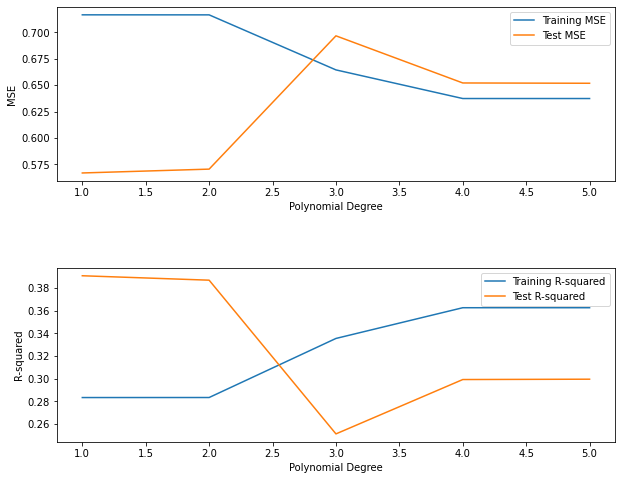

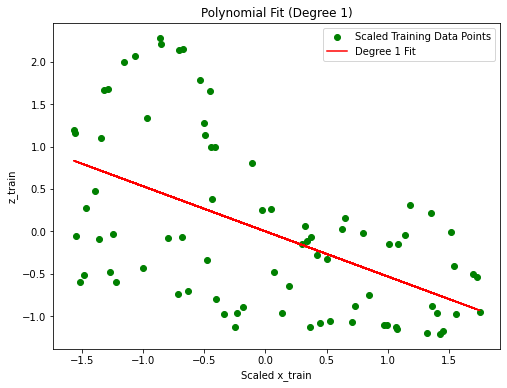

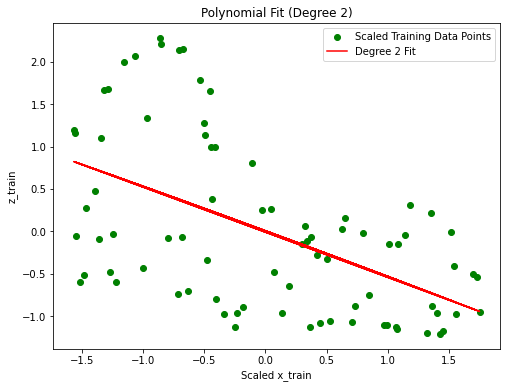

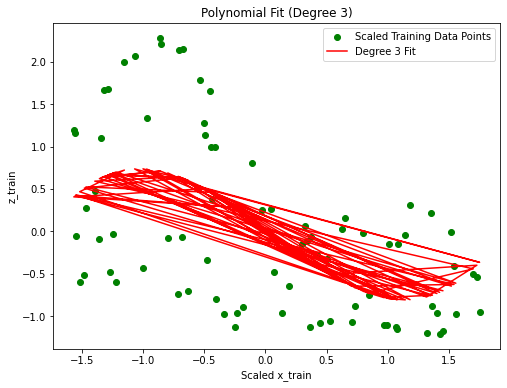

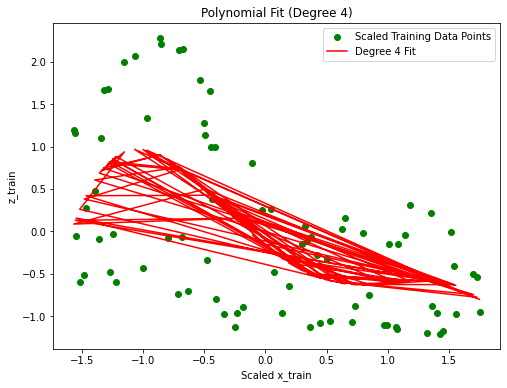

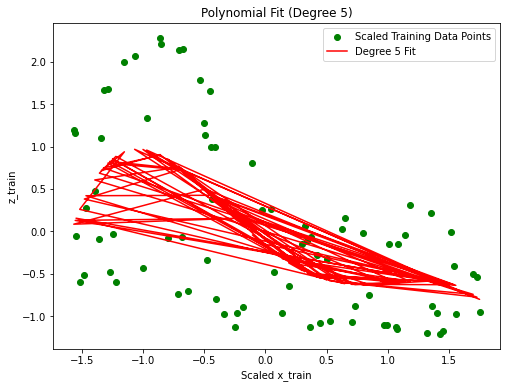

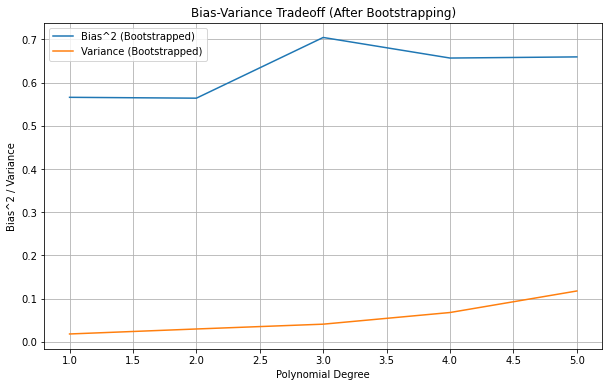

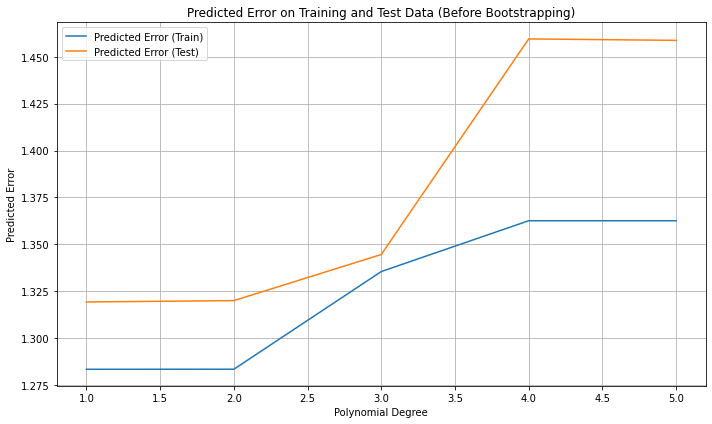

In [35]:
#Here, performing Bias-Variance Analysis and Bootstrapping to the OLS method with the Franke function:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
n = 100  # Adjust the number of data points as needed
x = np.random.rand(n)
y = np.random.rand(n)
z = FrankeFunction(x, y)

# Flatten the 1D arrays for data splitting
x_flat = x.reshape(-1, 1)
y_flat = y.reshape(-1, 1)
z_flat = z.reshape(-1, 1)

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
z_train_scaled = scaler.fit_transform(z_train)
z_test_scaled = scaler.transform(z_test)

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Create subplots for the training and test error as a function of model complexity
fig, axs = plt.subplots(2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate MSE and R-squared for training and test data
    mse_train = mean_squared_error(z_train_scaled, z_train_pred)
    mse_test = mean_squared_error(z_test_scaled, z_test_pred)
    r2_train = r2_score(z_train_scaled, z_train_pred)
    r2_test = r2_score(z_test_scaled, z_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Plot the polynomial fits for scaled data points
    if degree <= 5:
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train_scaled, z_train_scaled, label='Scaled Training Data Points', color='green')
        z_train_pred = model.predict(X_train)
        plt.plot(x_train_scaled, z_train_pred, color='red', label=f'Degree {degree} Fit')
        plt.xlabel('Scaled x_train')
        plt.ylabel('z_train')
        plt.legend()
        plt.title(f'Polynomial Fit (Degree {degree})')

# Plot training and test error as a function of model complexity (polynomial degree)
axs[0].plot(degree_range, mse_train_list, label='Training MSE')
axs[0].plot(degree_range, mse_test_list, label='Test MSE')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('MSE')
axs[0].legend()
plt.savefig('mse_plot_ridge.png')

# Plot training and test R-squared as a function of model complexity (polynomial degree)
axs[1].plot(degree_range, r2_train_list, label='Training R-squared')
axs[1].plot(degree_range, r2_test_list, label='Test R-squared')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('R-squared')
axs[1].legend()

# Perform Bootstrap Resampling for bias-variance analysis
n_bootstraps = 1000
max_degree = 5  # Maximum polynomial degree for bias-variance analysis
poly_degree = range(1, max_degree + 1)

# Initialize arrays to store bias and variance values
bias_squared = np.zeros(max_degree)
variance = np.zeros(max_degree)

# Initialize arrays to store predictions
z_pred_bootstraps = np.empty((z_test_scaled.shape[0], n_bootstraps))

for degree in poly_degree:
    for i in range(n_bootstraps):
        # Generate bootstrap sample from training data
        indices = np.random.randint(0, x_train_scaled.shape[0], x_train_scaled.shape[0])
        x_bootstrap = x_train_scaled[indices]
        z_bootstrap = z_train_scaled[indices]

        # Create polynomial features for the current degree
        X_bootstrap = np.ones_like(x_bootstrap)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_bootstrap = np.hstack((X_bootstrap, x_bootstrap**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit a linear regression model to the bootstrap sample
        model = LinearRegression()
        model.fit(X_bootstrap, z_bootstrap)

        # Make predictions on the test data
        z_pred = model.predict(X_test)

        # Store the predictions for bias-variance analysis
        z_pred_bootstraps[:, i] = z_pred.ravel()

    # Calculate bias^2 and variance for the current degree
    bias_squared[degree - 1] = np.mean((z_test_scaled - np.mean(z_pred_bootstraps, axis=1, keepdims=True))**2)
    variance[degree - 1] = np.mean(np.var(z_pred_bootstraps, axis=1, keepdims=True))

# Plot bias^2 and variance as a function of polynomial degree (after bootstrap)
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, bias_squared, label='Bias^2 (Bootstrapped)')
plt.plot(poly_degree, variance, label='Variance (Bootstrapped)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Bias^2 / Variance')
plt.legend()
plt.title('Bias-Variance Tradeoff (After Bootstrapping)')
plt.grid(True)
# Calculate bias^2 and variance before bootstrap (using the same code as above without bootstrapping)
# Initialize arrays to store bias and variance values
bias_squared_train_before = np.zeros(max_degree)
variance_train_before = np.zeros(max_degree)
predicted_error_train_before = np.zeros(max_degree)

bias_squared_test_before = np.zeros(max_degree)
variance_test_before = np.zeros(max_degree)
predicted_error_test_before = np.zeros(max_degree)

for degree in poly_degree:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate bias^2 for the current degree on training and test data
    bias_squared_train_before[degree - 1] = np.mean((z_train_scaled - np.mean(z_train_pred))**2)
    bias_squared_test_before[degree - 1] = np.mean((z_test_scaled - np.mean(z_test_pred))**2)

    # Calculate variance for the current degree on training and test data
    variance_train_before[degree - 1] = np.mean((z_train_pred - np.mean(z_train_pred))**2)
    variance_test_before[degree - 1] = np.mean((z_test_pred - np.mean(z_train_pred))**2)

    # Calculate predicted error as the sum of bias^2 and variance on training and test data
    predicted_error_train_before[degree - 1] = bias_squared_train_before[degree - 1] + variance_train_before[degree - 1]
    predicted_error_test_before[degree - 1] = bias_squared_test_before[degree - 1] + variance_test_before[degree - 1]

# Create a single plot for predicted error on both training and test data
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, predicted_error_train_before, label='Predicted Error (Train)')
plt.plot(poly_degree, predicted_error_test_before, label='Predicted Error (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predicted Error')
plt.title('Predicted Error on Training and Test Data (Before Bootstrapping)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#The data is producing consistent results. After bootstrapping, 
#low variance means that the model's predictions are not sensitive to variations in the training data. 
#In other words, the model is not overreacting to noise or random fluctuations in the data.
#But the high bias indicates that this is a case of underpredicting.
#The model is too simplistic to capture the complexity of the data.
#It doesn't adapt well to the training data, and it results in systematic errors.

#The bias-variance graph before bootstrapping shows that the Test data 
#getting a lower bias and higher variance as the polynomial degree increases, and 
#stablizes after the 4th degree polynomial, so the bias and variance doesn't change for the 5th degree.

#After bootstrapping, we got better scores for MSE and R-squared. Test MSE is now increasing, though not
#strictly, as polynomial degree increases, whereas Training MSE decreases. Training R2 increased as polynomial
#degree increases, whereas Test R2 decreased, though not strictly, and stablized after 4th degree.



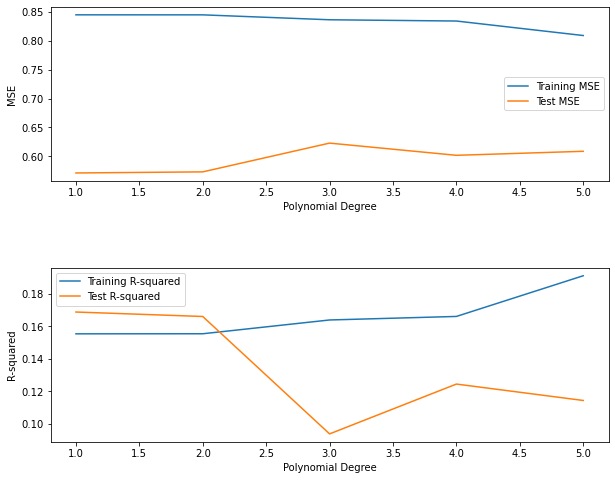

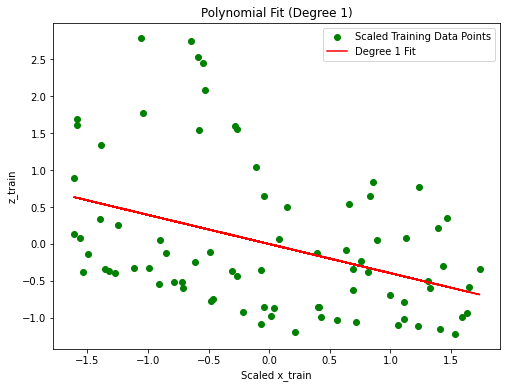

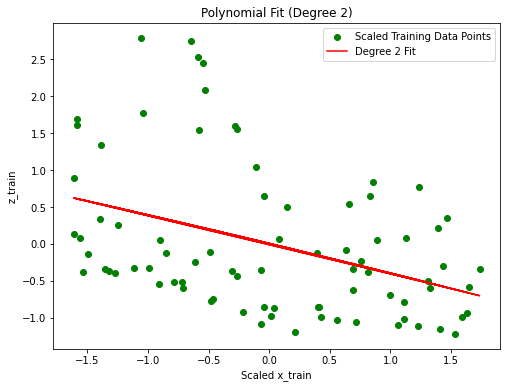

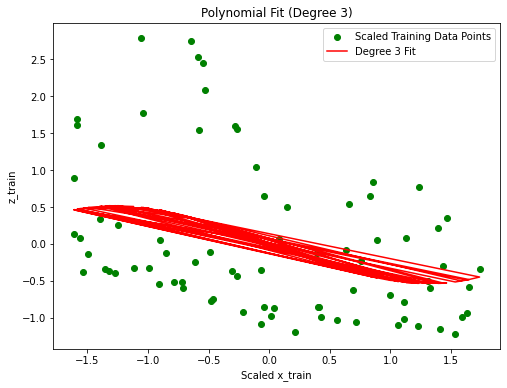

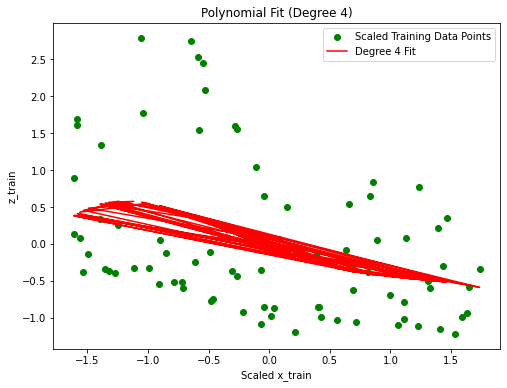

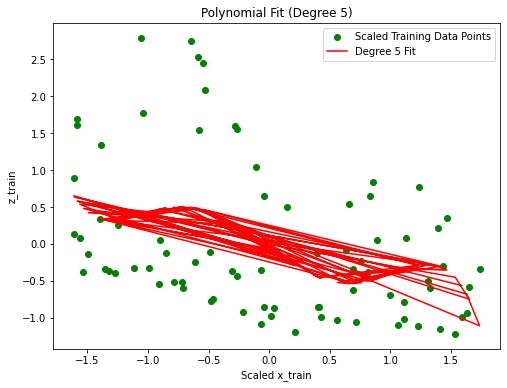

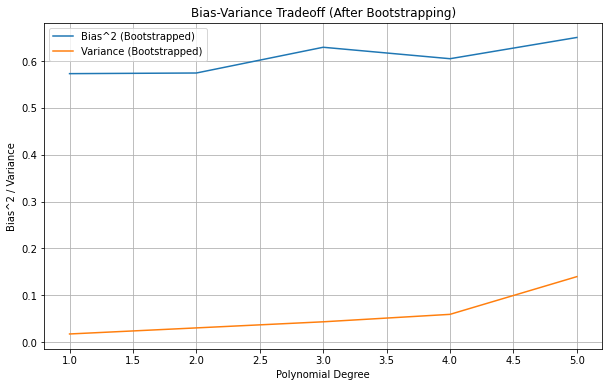

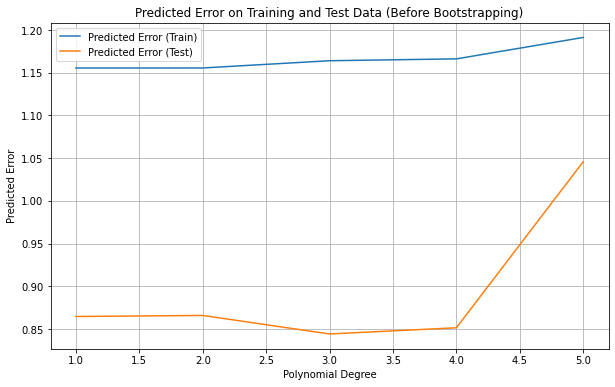

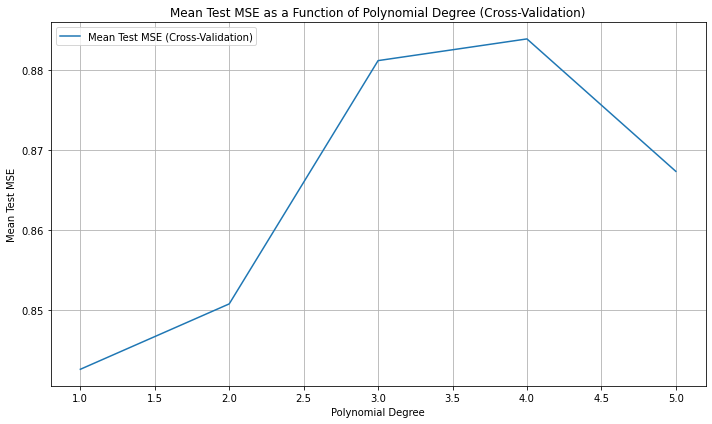

In [36]:
#OLS with Bootstrapping and Cross-Validation(2nd time running Bootstrap): 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
n = 100  # Adjust the number of data points as needed
x = np.random.rand(n)
y = np.random.rand(n)
z = FrankeFunction(x, y)

# Flatten the 1D arrays for data splitting
x_flat = x.reshape(-1, 1)
y_flat = y.reshape(-1, 1)
z_flat = z.reshape(-1, 1)

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
z_train_scaled = scaler.fit_transform(z_train)
z_test_scaled = scaler.transform(z_test)

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Create subplots for the training and test error as a function of model complexity
fig, axs = plt.subplots(2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate MSE and R-squared for training and test data
    mse_train = mean_squared_error(z_train_scaled, z_train_pred)
    mse_test = mean_squared_error(z_test_scaled, z_test_pred)
    r2_train = r2_score(z_train_scaled, z_train_pred)
    r2_test = r2_score(z_test_scaled, z_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Plot the polynomial fits for scaled data points
    if degree <= 5:
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train_scaled, z_train_scaled, label='Scaled Training Data Points', color='green')
        z_train_pred = model.predict(X_train)
        plt.plot(x_train_scaled, z_train_pred, color='red', label=f'Degree {degree} Fit')
        plt.xlabel('Scaled x_train')
        plt.ylabel('z_train')
        plt.legend()
        plt.title(f'Polynomial Fit (Degree {degree})')

# Plot training and test error as a function of model complexity (polynomial degree)
axs[0].plot(degree_range, mse_train_list, label='Training MSE')
axs[0].plot(degree_range, mse_test_list, label='Test MSE')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('MSE')
axs[0].legend()
plt.savefig('mse_plot_bootstrap2.png')

# Plot training and test R-squared as a function of model complexity (polynomial degree)
axs[1].plot(degree_range, r2_train_list, label='Training R-squared')
axs[1].plot(degree_range, r2_test_list, label='Test R-squared')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('R-squared')
axs[1].legend()

# Perform Bootstrap Resampling for bias-variance analysis
n_bootstraps = 1000
max_degree = 5  # Maximum polynomial degree for MSE analysis
poly_degree = range(1, max_degree + 1)

# Initialize arrays to store MSE values
mse_bootstrapped = np.zeros(max_degree)

# Initialize arrays to store predictions
z_pred_bootstraps = np.empty((z_test_scaled.shape[0], n_bootstraps))

for degree in poly_degree:
    for i in range(n_bootstraps):
        # Generate bootstrap sample from training data
        indices = np.random.randint(0, x_train_scaled.shape[0], x_train_scaled.shape[0])
        x_bootstrap = x_train_scaled[indices]
        z_bootstrap = z_train_scaled[indices]

        # Create polynomial features for the current degree
        X_bootstrap = np.ones_like(x_bootstrap)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_bootstrap = np.hstack((X_bootstrap, x_bootstrap**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit a linear regression model to the bootstrap sample
        model = LinearRegression()
        model.fit(X_bootstrap, z_bootstrap)

        # Make predictions on the test data
        z_pred = model.predict(X_test)

        # Store the predictions for MSE analysis
        z_pred_bootstraps[:, i] = z_pred.ravel()

    # Calculate MSE for the current degree
    mse_bootstrapped[degree - 1] = np.mean((z_test_scaled - np.mean(z_pred_bootstraps, axis=1, keepdims=True))**2)

# Plot MSE as a function of polynomial degree (after bootstrap)
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, mse_bootstrapped, label='MSE (Bootstrapped)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE as a Function of Polynomial Degree (After Bootstrapping)')
plt.grid(True)

# Calculate bias^2 and variance before bootstrap (using the same code as above without bootstrapping)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize arrays to store bias and variance values
bias_squared_train_before = np.zeros(max_degree)
variance_train_before = np.zeros(max_degree)
predicted_error_train_before = np.zeros(max_degree)

bias_squared_test_before = np.zeros(max_degree)
variance_test_before = np.zeros(max_degree)
predicted_error_test_before = np.zeros(max_degree)

for degree in poly_degree:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate bias^2 for the current degree on training and test data
    bias_squared_train_before[degree - 1] = np.mean((z_train_scaled - np.mean(z_train_pred))**2)
    bias_squared_test_before[degree - 1] = np.mean((z_test_scaled - np.mean(z_test_pred))**2)

    # Calculate variance for the current degree on training and test data
    variance_train_before[degree - 1] = np.mean((z_train_pred - np.mean(z_train_pred))**2)
    variance_test_before[degree - 1] = np.mean((z_test_pred - np.mean(z_train_pred))**2)

    # Calculate predicted error as the sum of bias^2 and variance on training and test data
    predicted_error_train_before[degree - 1] = bias_squared_train_before[degree - 1] + variance_train_before[degree - 1]
    predicted_error_test_before[degree - 1] = bias_squared_test_before[degree - 1] + variance_test_before[degree - 1]

# Create a single plot for predicted error on both training and test data
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, predicted_error_train_before, label='Predicted Error (Train)')
plt.plot(poly_degree, predicted_error_test_before, label='Predicted Error (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predicted Error')
plt.title('Predicted Error on Training and Test Data (Before Bootstrapping)')
plt.grid(True)
plt.legend()

# Now, add the code for k-fold cross-validation and MSE evaluation
# Define the number of folds for cross-validation
n_folds = 5  # You can adjust this as needed

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store MSE values for each fold
mse_values = []

# Iterate over the folds
for train_index, test_index in kf.split(x_flat):
    # Split the data into training and test sets for this fold
    x_train_cv, x_test_cv = x_flat[train_index], x_flat[test_index]
    y_train_cv, y_test_cv = y_flat[train_index], y_flat[test_index]
    z_train_cv, z_test_cv = z_flat[train_index], z_flat[test_index]

    # Scale the data using StandardScaler (you can reuse the scaler from your previous code)
    x_train_scaled_cv = scaler.transform(x_train_cv)
    x_test_scaled_cv = scaler.transform(x_test_cv)
    y_train_scaled_cv = scaler.transform(y_train_cv)
    y_test_scaled_cv = scaler.transform(y_test_cv)
    z_train_scaled_cv = scaler.transform(z_train_cv)
    z_test_scaled_cv = scaler.transform(z_test_cv)

    # Initialize lists to store MSE values for different degrees
    mse_train_list_cv = []
    mse_test_list_cv = []

    # Iterate over the polynomial degrees
    for degree in degree_range:
        # Create polynomial features for the current degree
        X_train_cv = np.ones_like(x_train_scaled_cv)
        X_test_cv = np.ones_like(x_test_scaled_cv)

        for d in range(1, degree + 1):
            X_train_cv = np.hstack((X_train_cv, x_train_scaled_cv**d))
            X_test_cv = np.hstack((X_test_cv, x_test_scaled_cv**d))

        # Fit a linear regression model to the training data
        model_cv = LinearRegression()
        model_cv.fit(X_train_cv, z_train_scaled_cv)

        # Make predictions on the training and test data
        z_train_pred_cv = model_cv.predict(X_train_cv)
        z_test_pred_cv = model_cv.predict(X_test_cv)

        # Calculate MSE for training and test data
        mse_train_cv = mean_squared_error(z_train_scaled_cv, z_train_pred_cv)
        mse_test_cv = mean_squared_error(z_test_scaled_cv, z_test_pred_cv)

        mse_train_list_cv.append(mse_train_cv)
        mse_test_list_cv.append(mse_test_cv)

    # Append the MSE value for the test data to the list for this fold
    mse_values.append(mse_test_list_cv)

# Calculate the mean MSE value across all folds for each degree
mean_mse_values = np.mean(mse_values, axis=0)

# Plot the mean MSE values as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degree_range, mean_mse_values, label='Mean Test MSE (Cross-Validation)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Test MSE')
plt.title('Mean Test MSE as a Function of Polynomial Degree (Cross-Validation)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#The Bias-Variance Tradeoff After Bootstrapping on the 2nd run gave a training MSE
#that is decreasing, but not as rapidly as the 1st run. The MSE values are in general 0.1-0.15 
#higher than in the first run.
#The test MSE is not as rapidly increasing as in the 1st run of the bootstrap.
#Here, it increases from 0.57 to 0.63. In the 1st run, in increased from 0.57 to 0.7.
#The training R2 in the 1st run increased from 0.28 to 0.36. In the 2nd run it
#increased from 0.16 to 0.19. The test R2 decreased from 0.39 to 0.25 and up to 0.28 in
#the first run. In the 2nd, run it decreased from 0.17 to 0.1 and then back up to 0.12.
#The results are quite different!


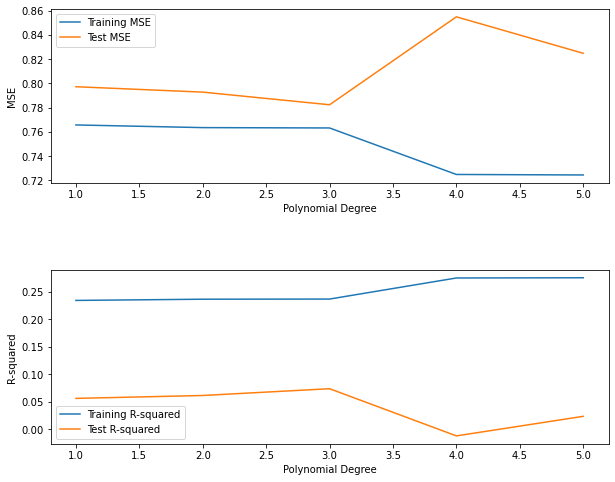

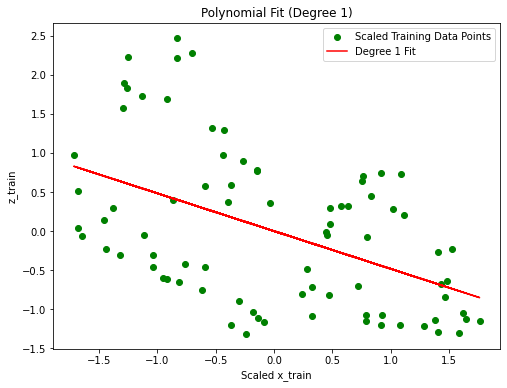

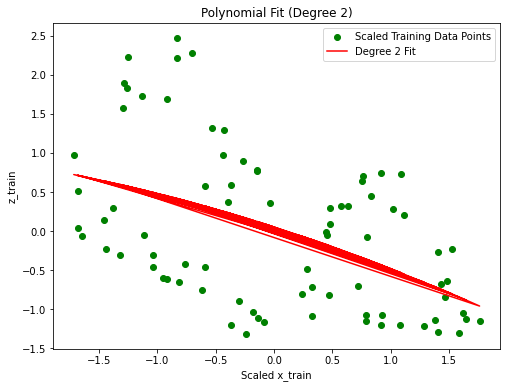

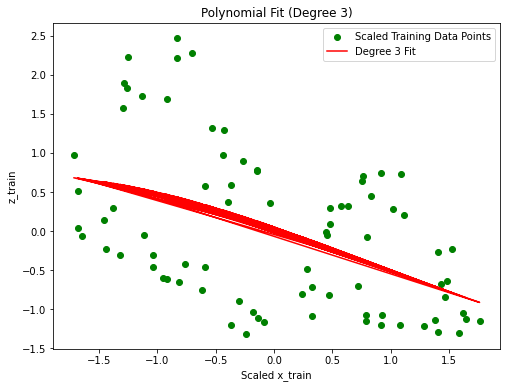

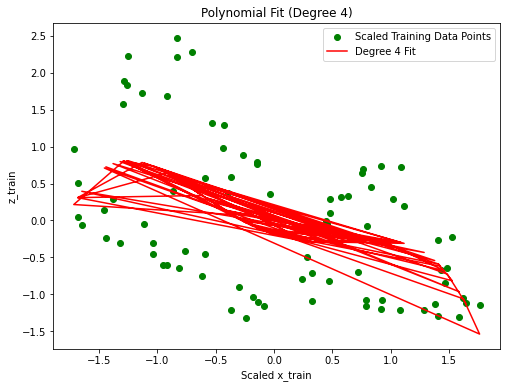

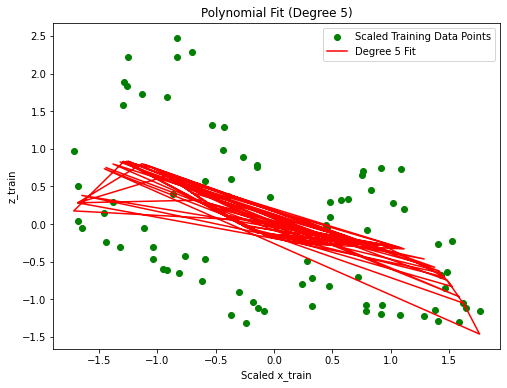

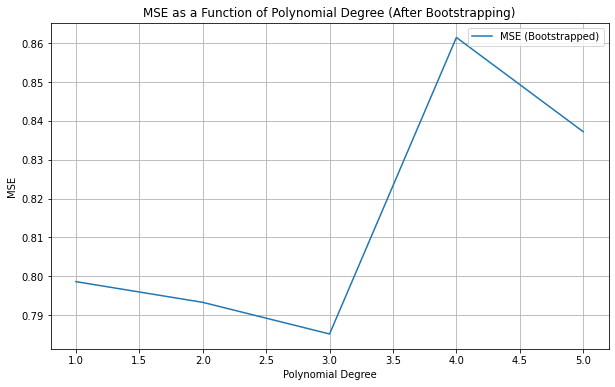

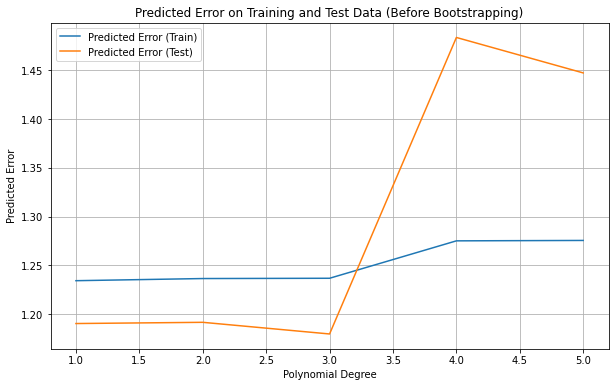

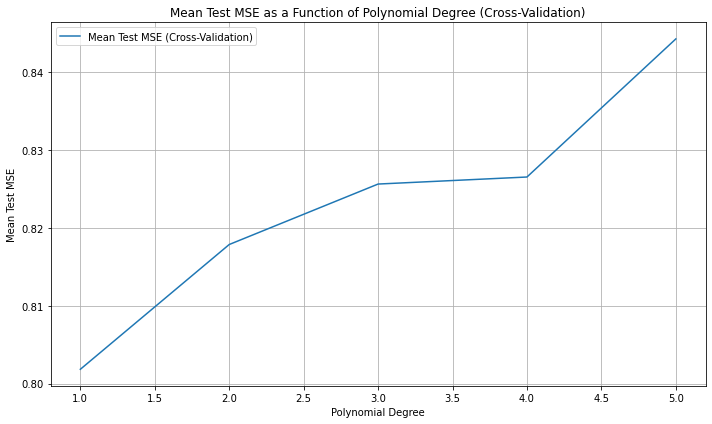

In [38]:
#Again OLS with Bootstrapping and Cross-Validation(3rd time running Bootstrap): 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
n = 100  # Adjust the number of data points as needed
x = np.random.rand(n)
y = np.random.rand(n)
z = FrankeFunction(x, y)

# Flatten the 1D arrays for data splitting
x_flat = x.reshape(-1, 1)
y_flat = y.reshape(-1, 1)
z_flat = z.reshape(-1, 1)

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
z_train_scaled = scaler.fit_transform(z_train)
z_test_scaled = scaler.transform(z_test)

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Create subplots for the training and test error as a function of model complexity
fig, axs = plt.subplots(2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate MSE and R-squared for training and test data
    mse_train = mean_squared_error(z_train_scaled, z_train_pred)
    mse_test = mean_squared_error(z_test_scaled, z_test_pred)
    r2_train = r2_score(z_train_scaled, z_train_pred)
    r2_test = r2_score(z_test_scaled, z_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Plot the polynomial fits for scaled data points
    if degree <= 5:
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train_scaled, z_train_scaled, label='Scaled Training Data Points', color='green')
        z_train_pred = model.predict(X_train)
        plt.plot(x_train_scaled, z_train_pred, color='red', label=f'Degree {degree} Fit')
        plt.xlabel('Scaled x_train')
        plt.ylabel('z_train')
        plt.legend()
        plt.title(f'Polynomial Fit (Degree {degree})')

# Plot training and test error as a function of model complexity (polynomial degree)
axs[0].plot(degree_range, mse_train_list, label='Training MSE')
axs[0].plot(degree_range, mse_test_list, label='Test MSE')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('MSE')
axs[0].legend()

# Plot training and test R-squared as a function of model complexity (polynomial degree)
axs[1].plot(degree_range, r2_train_list, label='Training R-squared')
axs[1].plot(degree_range, r2_test_list, label='Test R-squared')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('R-squared')
axs[1].legend()

# Perform Bootstrap Resampling for bias-variance analysis
n_bootstraps = 1000
max_degree = 5  # Maximum polynomial degree for MSE analysis
poly_degree = range(1, max_degree + 1)

# Initialize arrays to store MSE values
mse_bootstrapped = np.zeros(max_degree)

# Initialize arrays to store predictions
z_pred_bootstraps = np.empty((z_test_scaled.shape[0], n_bootstraps))

for degree in poly_degree:
    for i in range(n_bootstraps):
        # Generate bootstrap sample from training data
        indices = np.random.randint(0, x_train_scaled.shape[0], x_train_scaled.shape[0])
        x_bootstrap = x_train_scaled[indices]
        z_bootstrap = z_train_scaled[indices]

        # Create polynomial features for the current degree
        X_bootstrap = np.ones_like(x_bootstrap)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_bootstrap = np.hstack((X_bootstrap, x_bootstrap**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit a linear regression model to the bootstrap sample
        model = LinearRegression()
        model.fit(X_bootstrap, z_bootstrap)

        # Make predictions on the test data
        z_pred = model.predict(X_test)

        # Store the predictions for MSE analysis
        z_pred_bootstraps[:, i] = z_pred.ravel()

    # Calculate MSE for the current degree
    mse_bootstrapped[degree - 1] = np.mean((z_test_scaled - np.mean(z_pred_bootstraps, axis=1, keepdims=True))**2)

# Plot MSE as a function of polynomial degree (after bootstrap)
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, mse_bootstrapped, label='MSE (Bootstrapped)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE as a Function of Polynomial Degree (After Bootstrapping)')
plt.grid(True)

# Calculate bias^2 and variance before bootstrap (using the same code as above without bootstrapping)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize arrays to store bias and variance values
bias_squared_train_before = np.zeros(max_degree)
variance_train_before = np.zeros(max_degree)
predicted_error_train_before = np.zeros(max_degree)

bias_squared_test_before = np.zeros(max_degree)
variance_test_before = np.zeros(max_degree)
predicted_error_test_before = np.zeros(max_degree)

for degree in poly_degree:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate bias^2 for the current degree on training and test data
    bias_squared_train_before[degree - 1] = np.mean((z_train_scaled - np.mean(z_train_pred))**2)
    bias_squared_test_before[degree - 1] = np.mean((z_test_scaled - np.mean(z_test_pred))**2)

    # Calculate variance for the current degree on training and test data
    variance_train_before[degree - 1] = np.mean((z_train_pred - np.mean(z_train_pred))**2)
    variance_test_before[degree - 1] = np.mean((z_test_pred - np.mean(z_train_pred))**2)

    # Calculate predicted error as the sum of bias^2 and variance on training and test data
    predicted_error_train_before[degree - 1] = bias_squared_train_before[degree - 1] + variance_train_before[degree - 1]
    predicted_error_test_before[degree - 1] = bias_squared_test_before[degree - 1] + variance_test_before[degree - 1]

# Create a single plot for predicted error on both training and test data
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, predicted_error_train_before, label='Predicted Error (Train)')
plt.plot(poly_degree, predicted_error_test_before, label='Predicted Error (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predicted Error')
plt.title('Predicted Error on Training and Test Data (Before Bootstrapping)')
plt.grid(True)
plt.legend()

# Now, add the code for k-fold cross-validation and MSE evaluation
# Define the number of folds for cross-validation
n_folds = 10  # You can adjust this as needed

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store MSE values for each fold
mse_values = []

# Iterate over the folds
for train_index, test_index in kf.split(x_flat):
    # Split the data into training and test sets for this fold
    x_train_cv, x_test_cv = x_flat[train_index], x_flat[test_index]
    y_train_cv, y_test_cv = y_flat[train_index], y_flat[test_index]
    z_train_cv, z_test_cv = z_flat[train_index], z_flat[test_index]

    # Scale the data using StandardScaler (you can reuse the scaler from your previous code)
    x_train_scaled_cv = scaler.transform(x_train_cv)
    x_test_scaled_cv = scaler.transform(x_test_cv)
    y_train_scaled_cv = scaler.transform(y_train_cv)
    y_test_scaled_cv = scaler.transform(y_test_cv)
    z_train_scaled_cv = scaler.transform(z_train_cv)
    z_test_scaled_cv = scaler.transform(z_test_cv)

    # Initialize lists to store MSE values for different degrees
    mse_train_list_cv = []
    mse_test_list_cv = []

    # Iterate over the polynomial degrees
    for degree in degree_range:
        # Create polynomial features for the current degree
        X_train_cv = np.ones_like(x_train_scaled_cv)
        X_test_cv = np.ones_like(x_test_scaled_cv)

        for d in range(1, degree + 1):
            X_train_cv = np.hstack((X_train_cv, x_train_scaled_cv**d))
            X_test_cv = np.hstack((X_test_cv, x_test_scaled_cv**d))

        # Fit a linear regression model to the training data
        model_cv = LinearRegression()
        model_cv.fit(X_train_cv, z_train_scaled_cv)

        # Make predictions on the training and test data
        z_train_pred_cv = model_cv.predict(X_train_cv)
        z_test_pred_cv = model_cv.predict(X_test_cv)

        # Calculate MSE for training and test data
        mse_train_cv = mean_squared_error(z_train_scaled_cv, z_train_pred_cv)
        mse_test_cv = mean_squared_error(z_test_scaled_cv, z_test_pred_cv)

        mse_train_list_cv.append(mse_train_cv)
        mse_test_list_cv.append(mse_test_cv)

    # Append the MSE value for the test data to the list for this fold
    mse_values.append(mse_test_list_cv)

# Calculate the mean MSE value across all folds for each degree
mean_mse_values = np.mean(mse_values, axis=0)

# Plot the mean MSE values as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degree_range, mean_mse_values, label='Mean Test MSE (Cross-Validation)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Test MSE')
plt.title('Mean Test MSE as a Function of Polynomial Degree (Cross-Validation)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#The Bias-Variance Tradeoff After Bootstrapping on the 2nd run gave a training MSE
#that is decreasing, but not as rapidly as the 1st run. The MSE values are in general 0.1-0.15 
#higher than in the first run. On the 3rd run, I have a training MSE decreasing from 0.77 to 0.73.
#Now the training MSE values are in general 0.1 lower than in the 2nd run, 
#and closer to the 1st run. The test MSE values are increasing from 0.79 to 0.86, and
#they are around 0.2-0.25 higher than the 2nd run test MSE values. That is a very big difference.
#The test MSE is not as rapidly increasing as in the 1st run of the bootstrap.
#Here, it increases from 0.57 to 0.63. Again, in the 1st run, in increased from 0.57 to 0.7.

#The training R2 in the 1st run increased from 0.28 to 0.36. In the 2nd run it
#increased from 0.16 to 0.19. The test R2 decreased from 0.39 to 0.25 and up to 0.28 in
#the first run. In the 2nd, run it decreased from 0.17 to 0.1 and then back up to 0.12.
#The training R-squared in the 3rd run is from 0.24-0.26, somewhere in between the 1st and the
#2nd run. The test R-squared very low, from 0.06, decreasing to 0.00 and up to 0.03. This
#is lower than the 1st and 2nd run.

#Test MSE as a function of Polynomial Degree after Bootstrapping:
#begins at 0.8 for the 1st degree polynomial,
#decreases to 0.785 for the 3rd degree polynomial, increases to
#0.86 for the 4th degree, and decreases to 0.84 for the 5th-degree
#polynomial.

#Test MSE after Cross-Validation with 5-folds:
#Gave an MSE at 0.8 for the 1st degree polynomial, strictly increasing
#to 0.825 for the 4th degree polynomial, and 0.845 for the 5th degree.
#The polynomial degree that results in the lowest cross-validated MSE 
#is considered the optimal parameter for the OLS model for the given Franke function and dataset.
#So in this case it is unsurprisingly the 1st degree polynomial.

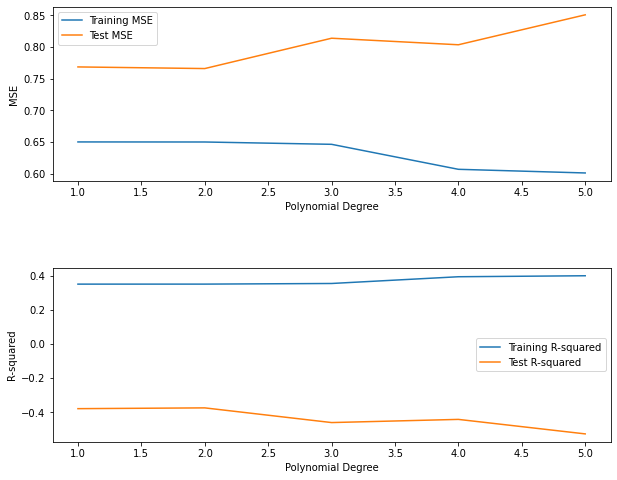

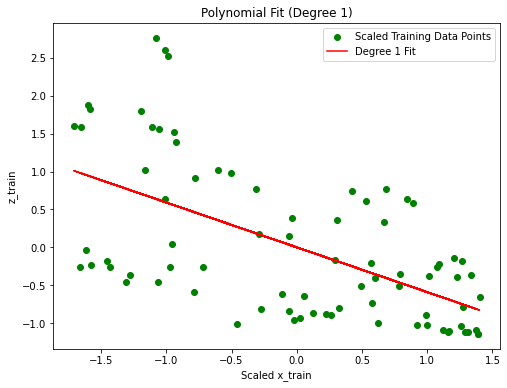

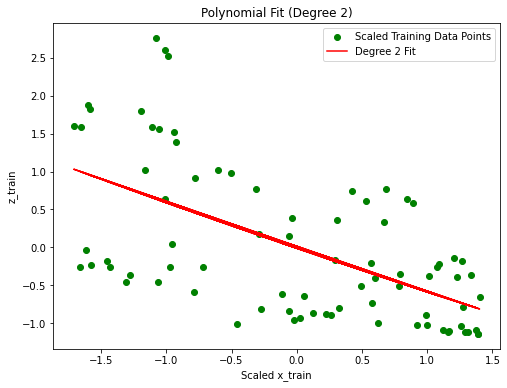

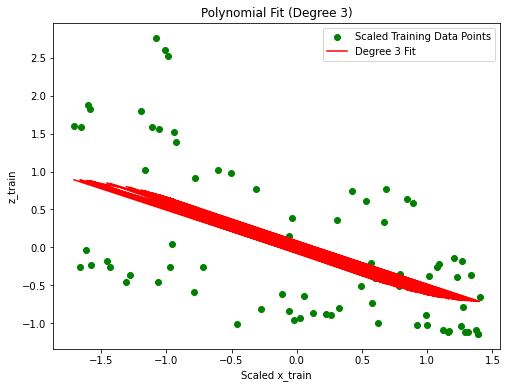

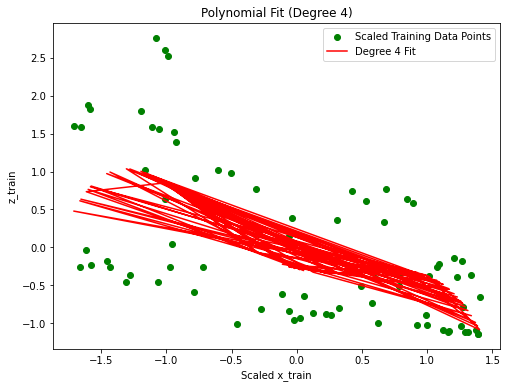

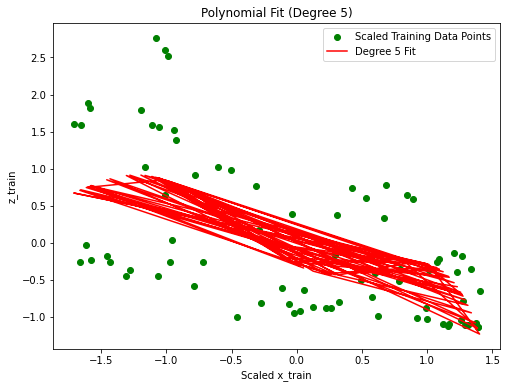

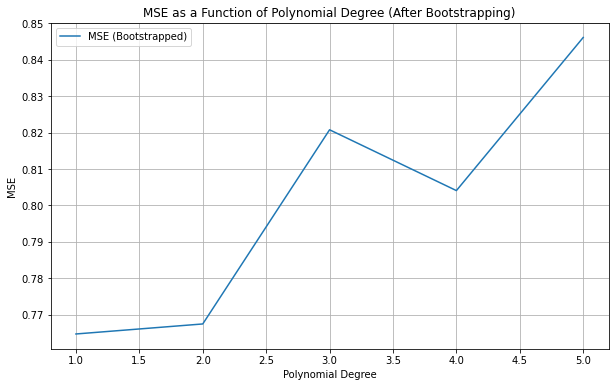

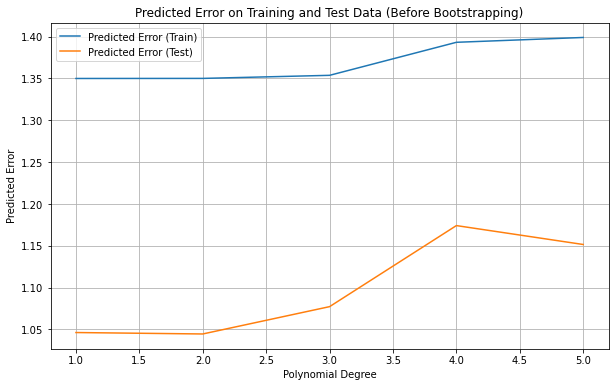

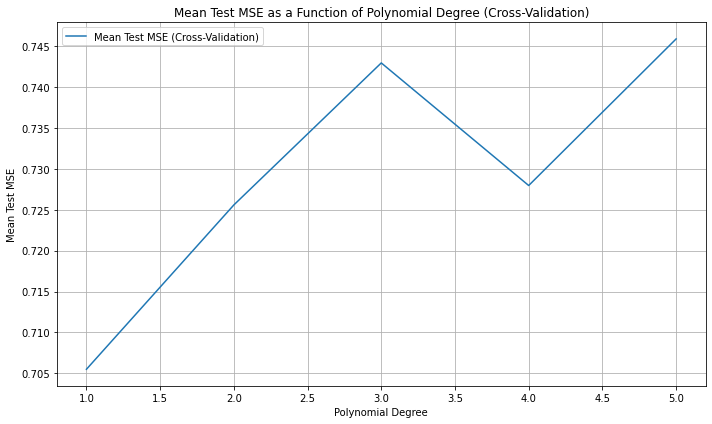

In [39]:
#Again OLS with Bootstrapping and Cross-Validation, this time using
#10-folds. (4th time running Bootstrap): 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
n = 100  # Adjust the number of data points as needed
x = np.random.rand(n)
y = np.random.rand(n)
z = FrankeFunction(x, y)

# Flatten the 1D arrays for data splitting
x_flat = x.reshape(-1, 1)
y_flat = y.reshape(-1, 1)
z_flat = z.reshape(-1, 1)

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
z_train_scaled = scaler.fit_transform(z_train)
z_test_scaled = scaler.transform(z_test)

# Initialize lists to store MSE and R-squared values for different degrees
degree_range = range(1, 6)
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Create subplots for the training and test error as a function of model complexity
fig, axs = plt.subplots(2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for degree in degree_range:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate MSE and R-squared for training and test data
    mse_train = mean_squared_error(z_train_scaled, z_train_pred)
    mse_test = mean_squared_error(z_test_scaled, z_test_pred)
    r2_train = r2_score(z_train_scaled, z_train_pred)
    r2_test = r2_score(z_test_scaled, z_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Plot the polynomial fits for scaled data points
    if degree <= 5:
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train_scaled, z_train_scaled, label='Scaled Training Data Points', color='green')
        z_train_pred = model.predict(X_train)
        plt.plot(x_train_scaled, z_train_pred, color='red', label=f'Degree {degree} Fit')
        plt.xlabel('Scaled x_train')
        plt.ylabel('z_train')
        plt.legend()
        plt.title(f'Polynomial Fit (Degree {degree})')

# Plot training and test error as a function of model complexity (polynomial degree)
axs[0].plot(degree_range, mse_train_list, label='Training MSE')
axs[0].plot(degree_range, mse_test_list, label='Test MSE')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('MSE')
axs[0].legend()

# Plot training and test R-squared as a function of model complexity (polynomial degree)
axs[1].plot(degree_range, r2_train_list, label='Training R-squared')
axs[1].plot(degree_range, r2_test_list, label='Test R-squared')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('R-squared')
axs[1].legend()

# Perform Bootstrap Resampling for bias-variance analysis
n_bootstraps = 1000
max_degree = 5  # Maximum polynomial degree for MSE analysis
poly_degree = range(1, max_degree + 1)

# Initialize arrays to store MSE values
mse_bootstrapped = np.zeros(max_degree)

# Initialize arrays to store predictions
z_pred_bootstraps = np.empty((z_test_scaled.shape[0], n_bootstraps))

for degree in poly_degree:
    for i in range(n_bootstraps):
        # Generate bootstrap sample from training data
        indices = np.random.randint(0, x_train_scaled.shape[0], x_train_scaled.shape[0])
        x_bootstrap = x_train_scaled[indices]
        z_bootstrap = z_train_scaled[indices]

        # Create polynomial features for the current degree
        X_bootstrap = np.ones_like(x_bootstrap)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_bootstrap = np.hstack((X_bootstrap, x_bootstrap**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit a linear regression model to the bootstrap sample
        model = LinearRegression()
        model.fit(X_bootstrap, z_bootstrap)

        # Make predictions on the test data
        z_pred = model.predict(X_test)

        # Store the predictions for MSE analysis
        z_pred_bootstraps[:, i] = z_pred.ravel()

    # Calculate MSE for the current degree
    mse_bootstrapped[degree - 1] = np.mean((z_test_scaled - np.mean(z_pred_bootstraps, axis=1, keepdims=True))**2)

# Plot MSE as a function of polynomial degree (after bootstrap)
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, mse_bootstrapped, label='MSE (Bootstrapped)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE as a Function of Polynomial Degree (After Bootstrapping)')
plt.grid(True)

# Calculate bias^2 and variance before bootstrap (using the same code as above without bootstrapping)

# Initialize arrays to store bias and variance values
bias_squared_train_before = np.zeros(max_degree)
variance_train_before = np.zeros(max_degree)
predicted_error_train_before = np.zeros(max_degree)

bias_squared_test_before = np.zeros(max_degree)
variance_test_before = np.zeros(max_degree)
predicted_error_test_before = np.zeros(max_degree)

for degree in poly_degree:
    # Create polynomial features for the current degree
    X_train = np.ones_like(x_train_scaled)
    X_test = np.ones_like(x_test_scaled)

    for d in range(1, degree + 1):
        X_train = np.hstack((X_train, x_train_scaled**d))
        X_test = np.hstack((X_test, x_test_scaled**d))

    model = LinearRegression()
    model.fit(X_train, z_train_scaled)

    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    # Calculate bias^2 for the current degree on training and test data
    bias_squared_train_before[degree - 1] = np.mean((z_train_scaled - np.mean(z_train_pred))**2)
    bias_squared_test_before[degree - 1] = np.mean((z_test_scaled - np.mean(z_test_pred))**2)

    # Calculate variance for the current degree on training and test data
    variance_train_before[degree - 1] = np.mean((z_train_pred - np.mean(z_train_pred))**2)
    variance_test_before[degree - 1] = np.mean((z_test_pred - np.mean(z_train_pred))**2)

    # Calculate predicted error as the sum of bias^2 and variance on training and test data
    predicted_error_train_before[degree - 1] = bias_squared_train_before[degree - 1] + variance_train_before[degree - 1]
    predicted_error_test_before[degree - 1] = bias_squared_test_before[degree - 1] + variance_test_before[degree - 1]

# Create a single plot for predicted error on both training and test data
plt.figure(figsize=(10, 6))
plt.plot(poly_degree, predicted_error_train_before, label='Predicted Error (Train)')
plt.plot(poly_degree, predicted_error_test_before, label='Predicted Error (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predicted Error')
plt.title('Predicted Error on Training and Test Data (Before Bootstrapping)')
plt.grid(True)
plt.legend()

# Now, add the code for k-fold cross-validation and MSE evaluation
# Define the number of folds for cross-validation
n_folds = 10  # You can adjust this as needed

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store MSE values for each fold
mse_values = []

# Iterate over the folds
for train_index, test_index in kf.split(x_flat):
    # Split the data into training and test sets for this fold
    x_train_cv, x_test_cv = x_flat[train_index], x_flat[test_index]
    y_train_cv, y_test_cv = y_flat[train_index], y_flat[test_index]
    z_train_cv, z_test_cv = z_flat[train_index], z_flat[test_index]

    # Scale the data using StandardScaler (you can reuse the scaler from your previous code)
    x_train_scaled_cv = scaler.transform(x_train_cv)
    x_test_scaled_cv = scaler.transform(x_test_cv)
    y_train_scaled_cv = scaler.transform(y_train_cv)
    y_test_scaled_cv = scaler.transform(y_test_cv)
    z_train_scaled_cv = scaler.transform(z_train_cv)
    z_test_scaled_cv = scaler.transform(z_test_cv)

    # Initialize lists to store MSE values for different degrees
    mse_train_list_cv = []
    mse_test_list_cv = []

    # Iterate over the polynomial degrees
    for degree in degree_range:
        # Create polynomial features for the current degree
        X_train_cv = np.ones_like(x_train_scaled_cv)
        X_test_cv = np.ones_like(x_test_scaled_cv)

        for d in range(1, degree + 1):
            X_train_cv = np.hstack((X_train_cv, x_train_scaled_cv**d))
            X_test_cv = np.hstack((X_test_cv, x_test_scaled_cv**d))

        # Fit a linear regression model to the training data
        model_cv = LinearRegression()
        model_cv.fit(X_train_cv, z_train_scaled_cv)

        # Make predictions on the training and test data
        z_train_pred_cv = model_cv.predict(X_train_cv)
        z_test_pred_cv = model_cv.predict(X_test_cv)

        # Calculate MSE for training and test data
        mse_train_cv = mean_squared_error(z_train_scaled_cv, z_train_pred_cv)
        mse_test_cv = mean_squared_error(z_test_scaled_cv, z_test_pred_cv)

        mse_train_list_cv.append(mse_train_cv)
        mse_test_list_cv.append(mse_test_cv)

    # Append the MSE value for the test data to the list for this fold
    mse_values.append(mse_test_list_cv)

# Calculate the mean MSE value across all folds for each degree
mean_mse_values = np.mean(mse_values, axis=0)

# Plot the mean MSE values as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degree_range, mean_mse_values, label='Mean Test MSE (Cross-Validation)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Test MSE')
plt.title('Mean Test MSE as a Function of Polynomial Degree (Cross-Validation)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#The Bias-Variance Tradeoff After Bootstrapping on the 2nd run gave a training MSE
#that is decreasing, but not as rapidly as the 1st run. The MSE values are in general 0.1-0.15 
#higher than in the first run. On the 3rd run, I have a training MSE decreasing from 0.77 to 0.73.
#Now the training MSE values are in general 0.1 lower than in the 2nd run, 
#and closer to the 1st run. The test MSE values are increasing from 0.79 to 0.86, and
#they are around 0.2-0.25 higher than the 2nd run test MSE values. That is a very big difference.
#The test MSE is not as rapidly increasing as in the 1st run of the bootstrap.
#Here, it increases from 0.57 to 0.63. Again, in the 1st run, in increased from 0.57 to 0.7.

#The training R2 in the 1st run increased from 0.28 to 0.36. In the 2nd run it
#increased from 0.16 to 0.19. The test R2 decreased from 0.39 to 0.25 and up to 0.28 in
#the first run. In the 2nd, run it decreased from 0.17 to 0.1 and then back up to 0.12.
#The training R-squared in the 3rd run is from 0.24-0.26, somewhere in between the 1st and the
#2nd run. The test R-squared very low, from 0.06, decreasing to 0.00 and up to 0.03. This
#is lower than the 1st and 2nd run.

#Test MSE as a function of Polynomial Degree after Bootstrapping:
#begins at 0.8 for the 1st degree polynomial,
#decreases to 0.785 for the 3rd degree polynomial, increases to
#0.86 for the 4th degree, and decreases to 0.84 for the 5th-degree
#polynomial.

#Test MSE after Cross-Validation with 10-folds:
#Gave an MSE at 0.705 for the 1st degree polynomial, but not strictly increasing
#like the 5-folds, topping at 0.742 for the 3rd-degree polynomial, decreasing to
#0.728 for the 4th-degree and up to 0.746 for the 5th-degree. It gave a lower
#MSE than the bootstrap, whereas the 5-fold gave a higher MSE than the bootstrap.

#As evidenced by the appendix, Cross-validation or bootstrapping does not always
#give the best results. It depends on the specific run, sometimes bootstrapping
#comes out on top, sometimes CV comes out on top. 

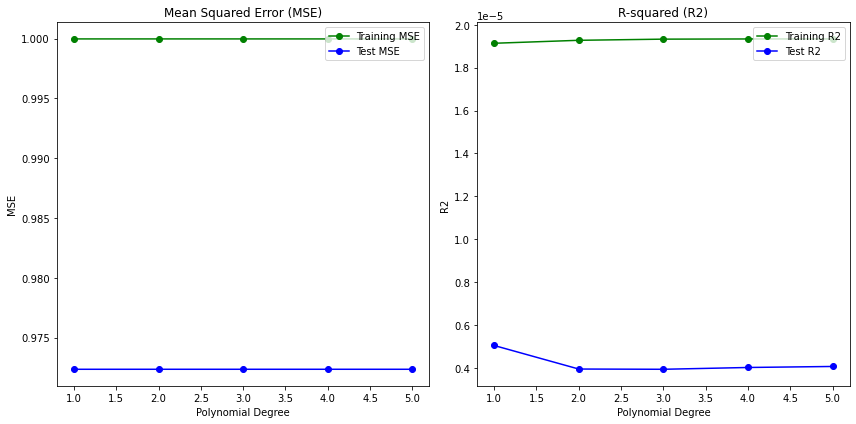

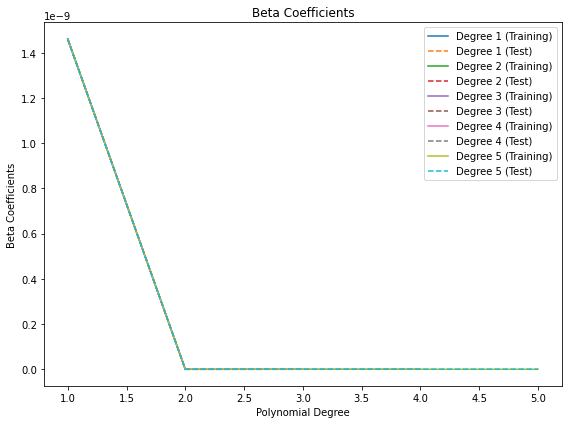

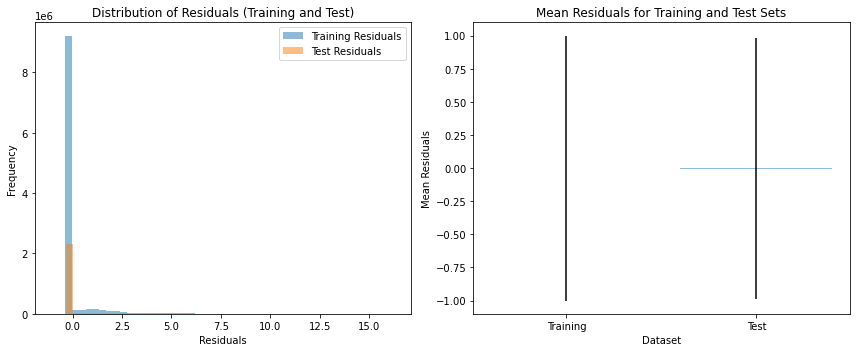

In [82]:
#OLS Method for topographical terrain data (fitting a polynomial to the real data:)
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 6)

# Initialize lists to store MSE and R2 values
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Initialize lists to store residuals
residuals_train = []
residuals_test = []

# Initialize lists to store beta coefficients for training and test data
beta_coeffs_train = []
beta_coeffs_test = []

# Perform polynomial regression for each degree and calculate MSE, R2, beta coefficients, and residuals
for degree in degree_range:
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    terrain_train_scaled = scaler.fit_transform(terrain_train.reshape(-1, 1))
    terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))
    
    # Flatten the data for regression
    X_train = np.arange(len(terrain_train_scaled)).reshape(-1, 1)
    y_train = terrain_train_scaled.ravel()
    X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
    y_test = terrain_test_scaled.ravel()
    
    # Create polynomial features for the current degree
    X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
    X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])
    
    # Create an instance of the LinearRegression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train_poly, y_train)
    
    # Make predictions on the training data
    train_pred = model.predict(X_train_poly)
    
    # Make predictions on the test data
    test_pred = model.predict(X_test_poly)
    
    # Extract beta coefficients
    beta_coeffs = model.coef_
    
    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    
    # Calculate R2 for training and test data
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    
    # Append MSE and R2 values to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    # Append beta coefficients to the lists
    beta_coeffs_train.append(beta_coeffs)
    
    # Calculate residuals for training and test data
    residuals_train.append(y_train - train_pred)
    residuals_test.append(y_test - test_pred)

# Plot MSE and R2 as functions of polynomial degree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Mean Squared Error (MSE)')
plt.plot(degree_range, mse_train_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('R-squared (R2)')
plt.plot(degree_range, r2_train_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot beta coefficients as functions of polynomial degree
plt.figure(figsize=(8, 6))
plt.title('Beta Coefficients')
for i in range(len(degree_range)):
    plt.plot(range(1, degree_range[i] + 1), beta_coeffs_train[i], label=f'Degree {degree_range[i]} (Training)')
    plt.plot(range(1, degree_range[i] + 1), beta_coeffs_train[i], '--', label=f'Degree {degree_range[i]} (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Coefficients')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Calculate the residuals for training data
residuals_train = y_train - terrain_train_pred

# Calculate the mean and standard deviation of residuals for training data
mean_residuals_train = np.mean(residuals_train)
std_residuals_train = np.std(residuals_train)

# Make predictions on the test data
terrain_test_pred = model.predict(X_test_poly)

# Calculate the residuals for test data
residuals_test = y_test - terrain_test_pred

# Calculate the mean and standard deviation of residuals for test data
mean_residuals_test = np.mean(residuals_test)
std_residuals_test = np.std(residuals_test)

# Plot histograms of residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=50, label='Training Residuals', alpha=0.5)
plt.hist(residuals_test, bins=50, label='Test Residuals', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Residuals (Training and Test)')

plt.subplot(1, 2, 2)
plt.bar(['Training', 'Test'], [mean_residuals_train, mean_residuals_test],
        yerr=[std_residuals_train, std_residuals_test], alpha=0.5)
plt.xlabel('Dataset')
plt.ylabel('Mean Residuals')
plt.title('Mean Residuals for Training and Test Sets')

plt.tight_layout()
plt.show()


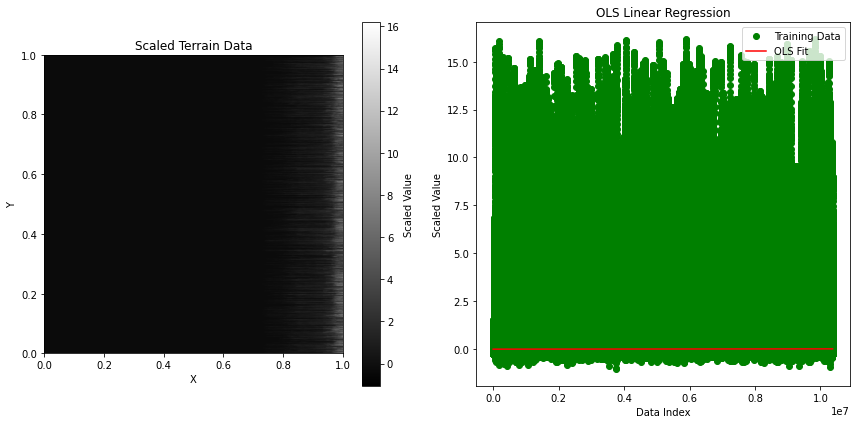

Mean Squared Error on Training Data: 1.0000
Mean Squared Error on Test Data: 0.9724
R-squared on Training Data: 0.0000
R-squared on Test Data: 0.0000


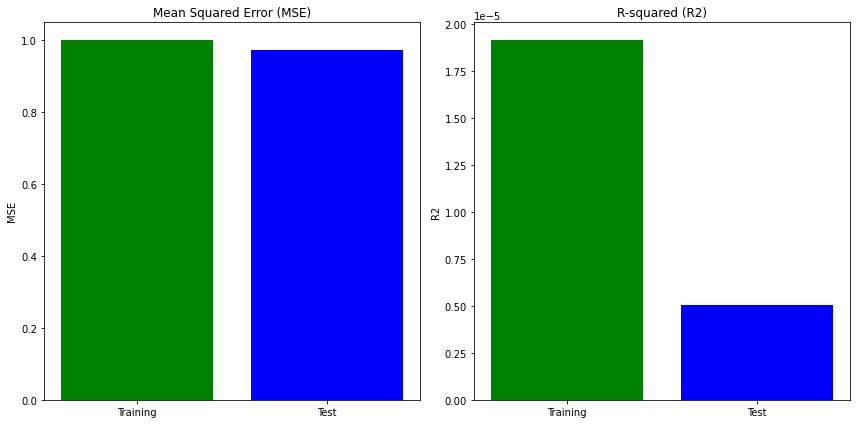

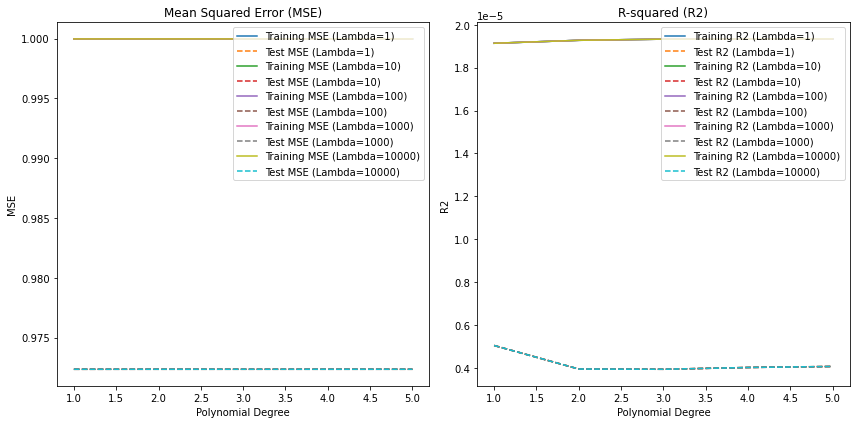

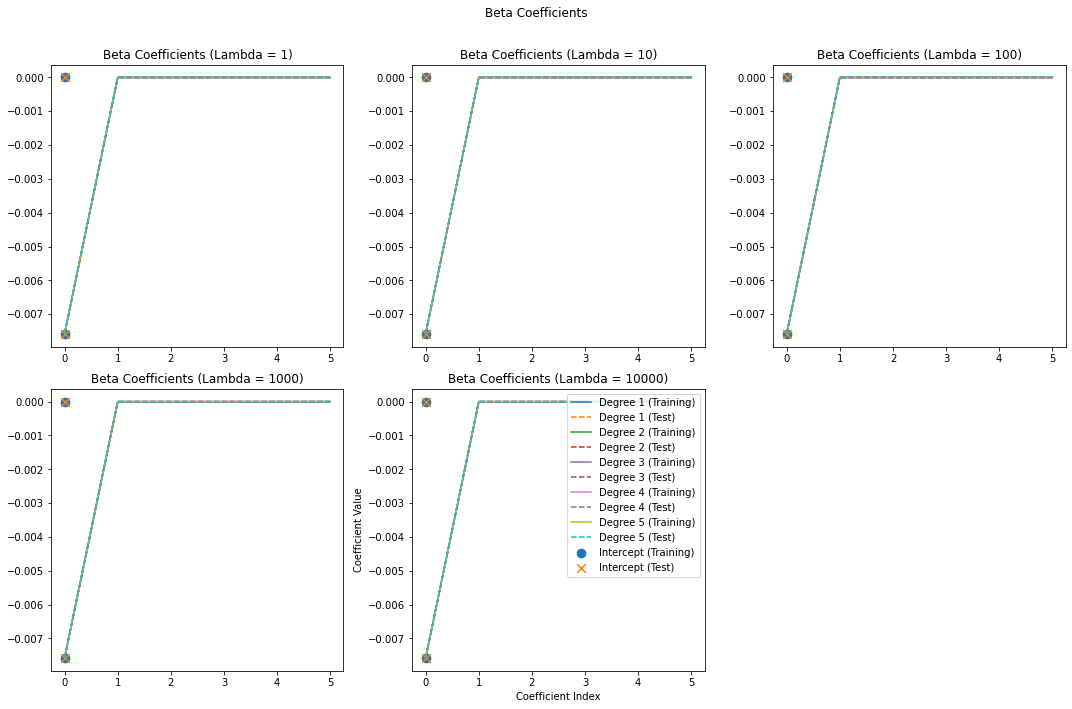

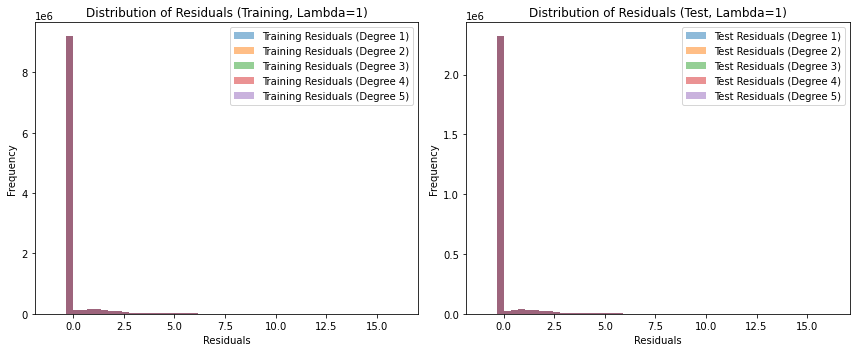

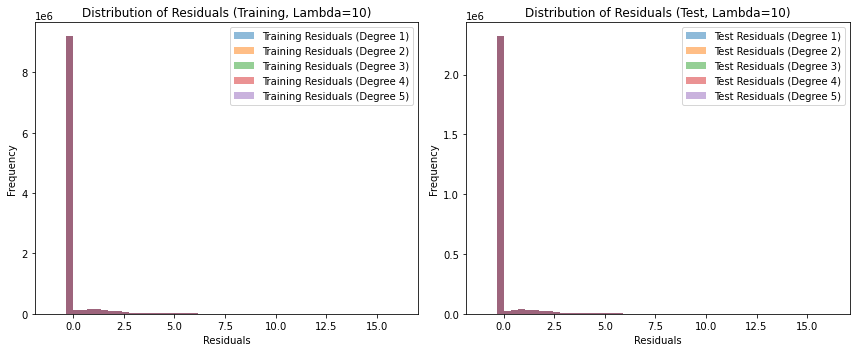

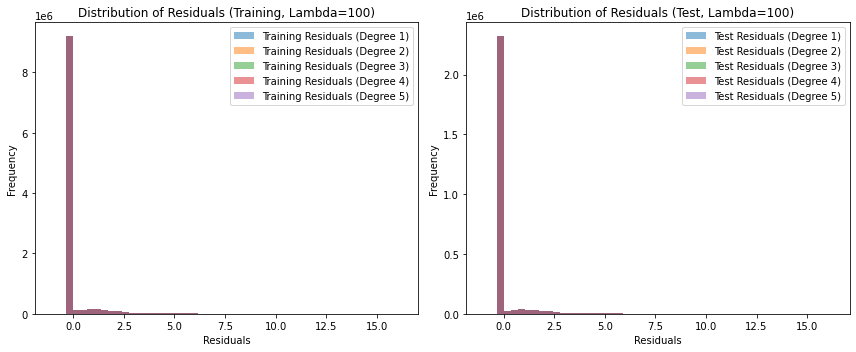

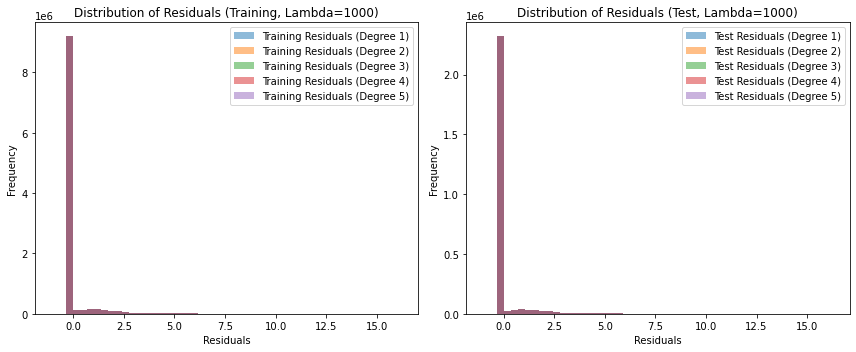

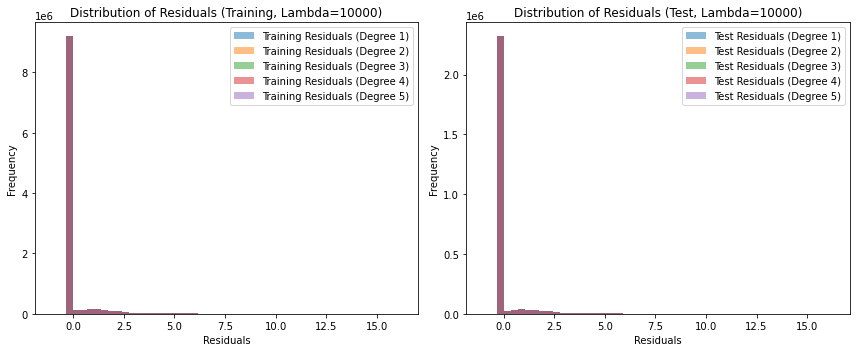

In [169]:
#Ridge regression method for topographical terrain data:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # Import Ridge regression
from sklearn.metrics import mean_squared_error, r2_score

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 6)

# Initialize lists to store MSE and R2 values
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Initialize lists to store beta coefficients for training and test data
beta_coeffs_train = []
beta_coeffs_test = []

# Initialize lists to store residuals
residuals_train = []
residuals_test = []

# Define a list of lambda values for regularization
lambda_values = [1, 10, 100, 1000, 10000]

# Perform Ridge regression for each degree and lambda value
for lambda_val in lambda_values:
    mse_train_lambda = []
    mse_test_lambda = []
    r2_train_lambda = []
    r2_test_lambda = []
    beta_coeffs_train_lambda = []
    beta_coeffs_test_lambda = []
    residuals_train_lambda = []
    residuals_test_lambda = []

    for degree in degree_range:
        # Scale the data using StandardScaler
        scaler = StandardScaler()
        terrain_train_scaled = scaler.fit_transform(terrain_train.reshape(-1, 1))
        terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))

        # Flatten the data for regression
        X_train = np.arange(len(terrain_train_scaled)).reshape(-1, 1)
        y_train = terrain_train_scaled.ravel()
        X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
        y_test = terrain_test_scaled.ravel()

        # Create polynomial features for the current degree for both training and test data
        X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
        X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

        # Create an instance of the Ridge model with the current lambda
        model = Ridge(alpha=lambda_val)

        # Fit the Ridge model to the training data
        model.fit(X_train_poly, y_train)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Make predictions on the test data
        test_pred = model.predict(X_test_poly)

        # Extract beta coefficients
        beta_coeffs = np.concatenate(([model.intercept_], model.coef_))  # Include the intercept

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)
        
        # Calculate R2 for training and test data
        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        # Append MSE and R2 values to the corresponding lists
        mse_train_lambda.append(mse_train)
        mse_test_lambda.append(mse_test)
        r2_train_lambda.append(r2_train)
        r2_test_lambda.append(r2_test)
        
        # Append beta coefficients to the corresponding lists
        beta_coeffs_train_lambda.append(beta_coeffs)
        beta_coeffs_test_lambda.append(beta_coeffs)

        # Calculate residuals for training and test data
        residuals_train_lambda.append(y_train - train_pred)
        residuals_test_lambda.append(y_test - test_pred)

    # Append the lists for the current lambda value to the main lists
    mse_train_list.append(mse_train_lambda)
    mse_test_list.append(mse_test_lambda)
    r2_train_list.append(r2_train_lambda)
    r2_test_list.append(r2_test_lambda)
    beta_coeffs_train.append(beta_coeffs_train_lambda)
    beta_coeffs_test.append(beta_coeffs_test_lambda)
    residuals_train.append(residuals_train_lambda)
    residuals_test.append(residuals_test_lambda)
    
# Plot MSE and R2 as functions of polynomial degree for different lambda values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Mean Squared Error (MSE)')
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, mse_train_list[i], label=f'Training MSE (Lambda={lambda_val})', linestyle='-')
    plt.plot(degree_range, mse_test_list[i], label=f'Test MSE (Lambda={lambda_val})', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('R-squared (R2)')
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, r2_train_list[i], label=f'Training R2 (Lambda={lambda_val})', linestyle='-')
    plt.plot(degree_range, r2_test_list[i], label=f'Test R2 (Lambda={lambda_val})', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
# Plot beta coefficients as functions of polynomial degree
plt.figure(figsize=(15, 10))
plt.suptitle('Beta Coefficients')
for i, lambda_val in enumerate(lambda_values):
    beta_coeffs_train_plot = []
    beta_coeffs_test_plot = []

    for j in range(len(degree_range)):
        # Extract beta coefficients for the current lambda and degree
        beta_coeffs_train_val = beta_coeffs_train[i][j]
        beta_coeffs_test_val = beta_coeffs_test[i][j]

        # Ensure that each beta_coeffs array has the same length (coefficients up to degree 5)
        beta_coeffs_train_val = np.pad(beta_coeffs_train_val, (0, max(0, 5 - len(beta_coeffs_train_val) + 1)), 'constant')
        beta_coeffs_test_val = np.pad(beta_coeffs_test_val, (0, max(0, 5 - len(beta_coeffs_test_val) + 1)), 'constant')

        # Append beta coefficients to the lists
        beta_coeffs_train_plot.append(beta_coeffs_train_val)
        beta_coeffs_test_plot.append(beta_coeffs_test_val)

    # Create subplots for each lambda value
    plt.subplot(2, 3, i + 1)
    plt.title(f'Beta Coefficients (Lambda = {lambda_val})')
    for j in range(len(degree_range)):
        # Plot beta coefficients for the current degree
        plt.plot(range(len(beta_coeffs_train_plot[j])), beta_coeffs_train_plot[j], label=f'Degree {degree_range[j]} (Training)', linestyle='-')
        plt.plot(range(len(beta_coeffs_test_plot[j])), beta_coeffs_test_plot[j], label=f'Degree {degree_range[j]} (Test)', linestyle='--')

    # Extract and plot the intercept
    intercept_train = beta_coeffs_train[i][0]
    intercept_test = beta_coeffs_test[i][0]
    
    # Create an array with the same size as intercept values
    intercept_x = np.zeros_like(intercept_train)
    
    plt.scatter(intercept_x, intercept_train, label=f'Intercept (Training)', marker='o', s=75)
    plt.scatter(intercept_x, intercept_test, label=f'Intercept (Test)', marker='x', s=75)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Plot histograms of residuals for each lambda value
for i, lambda_val in enumerate(lambda_values):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of Residuals (Training, Lambda={lambda_val})')
    for j in range(len(degree_range)):
        plt.hist(residuals_train[i][j], bins=50, label=f'Training Residuals (Degree {degree_range[j]})', alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.title(f'Distribution of Residuals (Test, Lambda={lambda_val})')
    for j in range(len(degree_range)):
        plt.hist(residuals_test[i][j], bins=50, label=f'Test Residuals (Degree {degree_range[j]})', alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


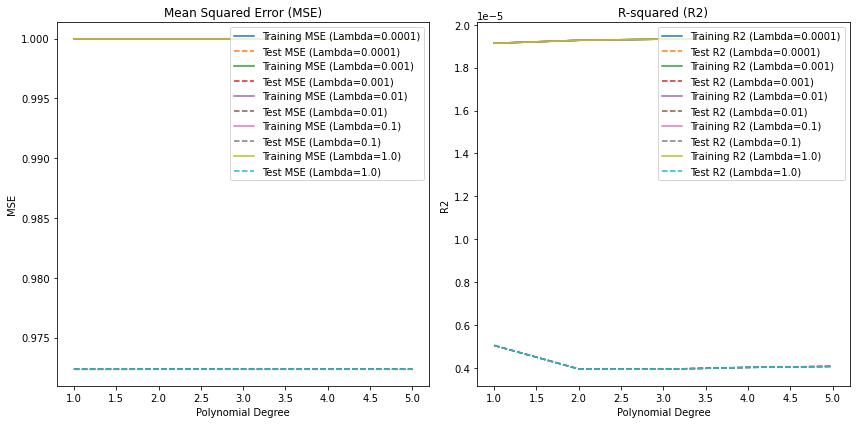

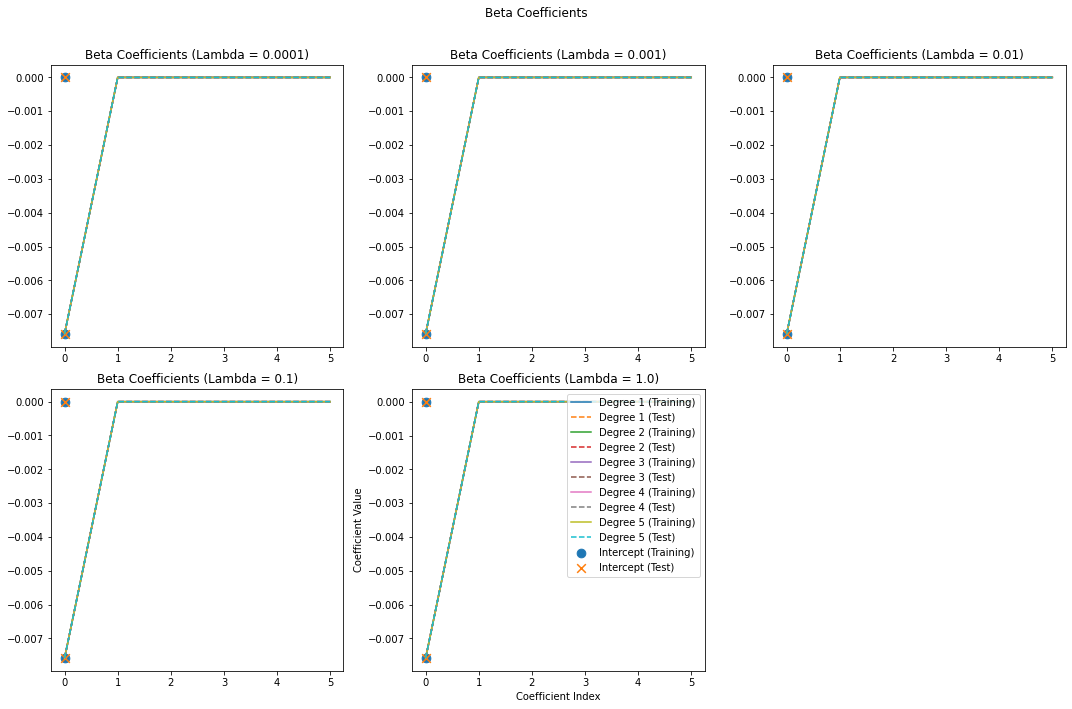

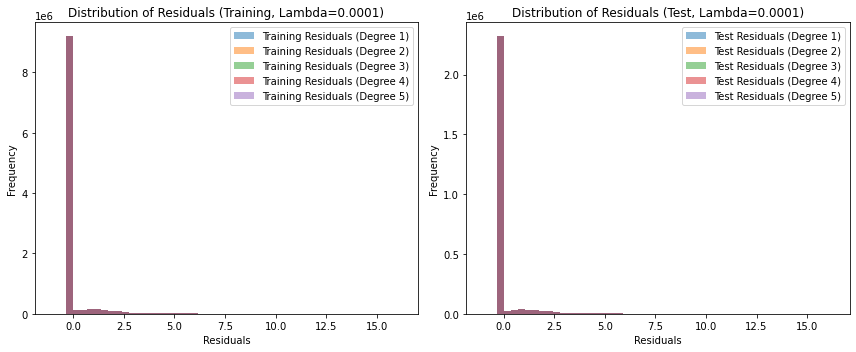

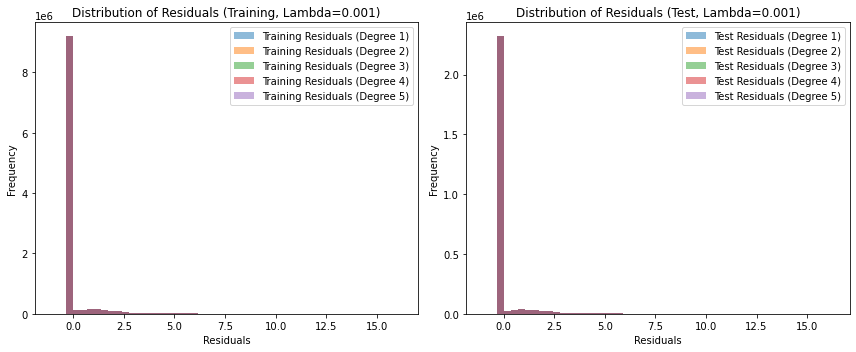

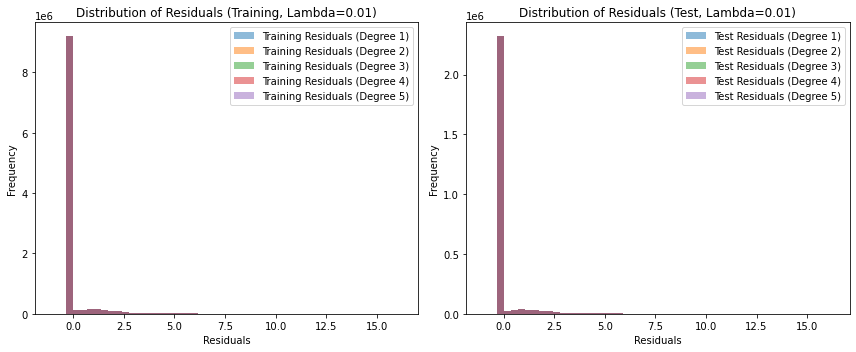

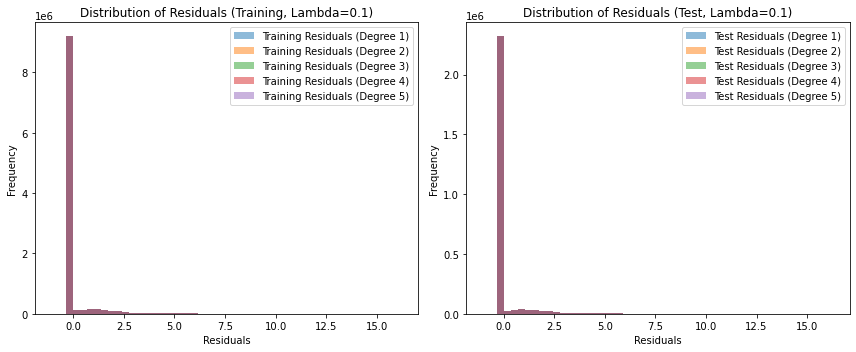

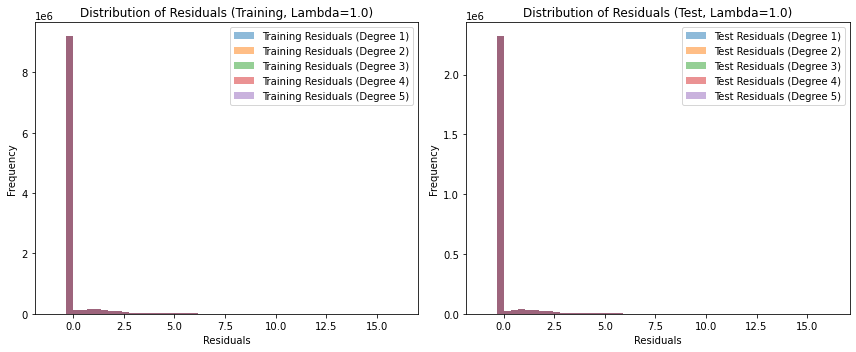

In [72]:
#Topographical data using Lasso regression:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso  # Import Lasso regression
from sklearn.metrics import mean_squared_error, r2_score

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 6)

# Initialize lists to store MSE and R2 values
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Initialize lists to store beta coefficients for training and test data
beta_coeffs_train = []
beta_coeffs_test = []

# Initialize lists to store residuals
residuals_train = []
residuals_test = []

# Define a list of lambda values for regularization
lambda_values = [1, 10, 100, 1000, 10000]

# Perform Lasso regression for each degree and lambda value
for lambda_val in lambda_values:
    mse_train_lambda = []
    mse_test_lambda = []
    r2_train_lambda = []
    r2_test_lambda = []
    beta_coeffs_train_lambda = []
    beta_coeffs_test_lambda = []
    residuals_train_lambda = []
    residuals_test_lambda = []

    for degree in degree_range:
        # Scale the data using StandardScaler
        scaler = StandardScaler()
        terrain_train_scaled = scaler.fit_transform(terrain_train.reshape(-1, 1))
        terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))

        # Flatten the data for regression
        X_train = np.arange(len(terrain_train_scaled)).reshape(-1, 1)
        y_train = terrain_train_scaled.ravel()
        X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
        y_test = terrain_test_scaled.ravel()

        # Create polynomial features for the current degree for both training and test data
        X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
        X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

        # Create an instance of the Lasso model with the current lambda
        model = Lasso(alpha=lambda_val)

        # Fit the Lasso model to the training data
        model.fit(X_train_poly, y_train)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Make predictions on the test data
        test_pred = model.predict(X_test_poly)

        # Extract beta coefficients
        beta_coeffs = np.concatenate(([model.intercept_], model.coef_))  # Include the intercept

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)
        
        # Calculate R2 for training and test data
        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        # Append MSE and R2 values to the corresponding lists
        mse_train_lambda.append(mse_train)
        mse_test_lambda.append(mse_test)
        r2_train_lambda.append(r2_train)
        r2_test_lambda.append(r2_test)
        
        # Append beta coefficients to the corresponding lists
        beta_coeffs_train_lambda.append(beta_coeffs)
        beta_coeffs_test_lambda.append(beta_coeffs)

        # Calculate residuals for training and test data
        residuals_train_lambda.append(y_train - train_pred)
        residuals_test_lambda.append(y_test - test_pred)

    # Append the lists for the current lambda value to the main lists
    mse_train_list.append(mse_train_lambda)
    mse_test_list.append(mse_test_lambda)
    r2_train_list.append(r2_train_lambda)
    r2_test_list.append(r2_test_lambda)
    beta_coeffs_train.append(beta_coeffs_train_lambda)
    beta_coeffs_test.append(beta_coeffs_test_lambda)
    residuals_train.append(residuals_train_lambda)
    residuals_test.append(residuals_test_lambda)
    
# Plot MSE and R2 as functions of polynomial degree for different lambda values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Mean Squared Error (MSE)')
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, mse_train_list[i], label=f'Training MSE (Lambda={lambda_val})', linestyle='-')
    plt.plot(degree_range, mse_test_list[i], label=f'Test MSE (Lambda={lambda_val})', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('R-squared (R2)')
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, r2_train_list[i], label=f'Training R2 (Lambda={lambda_val})', linestyle='-')
    plt.plot(degree_range, r2_test_list[i], label=f'Test R2 (Lambda={lambda_val})', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot beta coefficients as functions of polynomial degree
plt.figure(figsize=(15, 10))
plt.suptitle('Beta Coefficients')
for i, lambda_val in enumerate(lambda_values):
    beta_coeffs_train_plot = []
    beta_coeffs_test_plot = []

    for j in range(len(degree_range)):
        # Extract beta coefficients for the current lambda and degree
        beta_coeffs_train_val = beta_coeffs_train[i][j]
        beta_coeffs_test_val = beta_coeffs_test[i][j]

        # Ensure that each beta_coeffs array has the same length (coefficients up to degree 5)
        beta_coeffs_train_val = np.pad(beta_coeffs_train_val, (0, max(0, 5 - len(beta_coeffs_train_val) + 1)), 'constant')
        beta_coeffs_test_val = np.pad(beta_coeffs_test_val, (0, max(0, 5 - len(beta_coeffs_test_val) + 1)), 'constant')

        # Append beta coefficients to the lists
        beta_coeffs_train_plot.append(beta_coeffs_train_val)
        beta_coeffs_test_plot.append(beta_coeffs_test_val)

    # Create subplots for each lambda value
    plt.subplot(2, 3, i + 1)
    plt.title(f'Beta Coefficients (Lambda = {lambda_val})')
    for j in range(len(degree_range)):
        # Plot beta coefficients for the current degree
        plt.plot(range(len(beta_coeffs_train_plot[j])), beta_coeffs_train_plot[j], label=f'Degree {degree_range[j]} (Training)', linestyle='-')
        plt.plot(range(len(beta_coeffs_test_plot[j])), beta_coeffs_test_plot[j], label=f'Degree {degree_range[j]} (Test)', linestyle='--')

    # Extract and plot the intercept
    intercept_train = beta_coeffs_train[i][0]
    intercept_test = beta_coeffs_test[i][0]
    
    # Create an array with the same size as intercept values
    intercept_x = np.zeros_like(intercept_train)
    
    plt.scatter(intercept_x, intercept_train, label=f'Intercept (Training)', marker='o', s=75)
    plt.scatter(intercept_x, intercept_test, label=f'Intercept (Test)', marker='x', s=75)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Plot histograms of residuals for each lambda value
for i, lambda_val in enumerate(lambda_values):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of Residuals (Training, Lambda={lambda_val})')
    for j in range(len(degree_range)):
        plt.hist(residuals_train[i][j], bins=50, label=f'Training Residuals (Degree {degree_range[j]})', alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.title(f'Distribution of Residuals (Test, Lambda={lambda_val})')
    for j in range(len(degree_range)):
        plt.hist(residuals_test[i][j], bins=50, label=f'Test Residuals (Degree {degree_range[j]})', alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


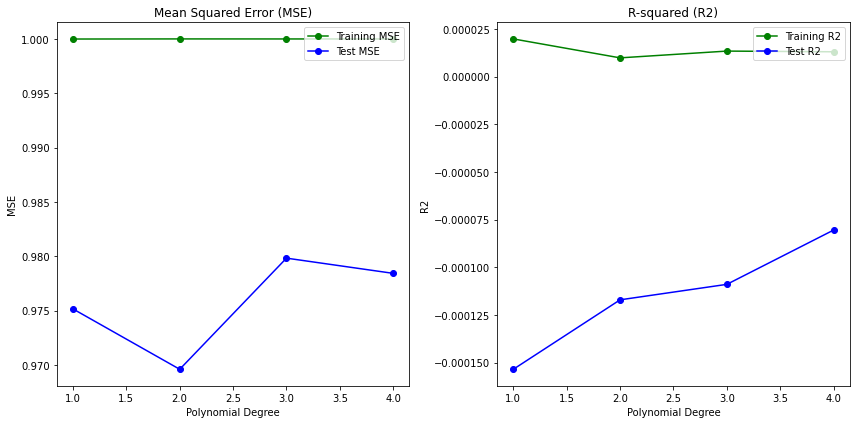

In [98]:
#Topographical OLS with Bootstrapping:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 5)

# Initialize lists to store MSE and R2 values
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Perform bootstrap resampling for each degree and calculate MSE and R2
n_bootstrap = 20  # Number of bootstrap iterations

for degree in degree_range:
    mse_train_bootstrap = []
    mse_test_bootstrap = []
    r2_train_bootstrap = []
    r2_test_bootstrap = []

    for _ in range(n_bootstrap):
        # Resample with replacement from the training data
        terrain_train_sampled = resample(terrain_train, random_state=np.random.randint(0, 1000))

        # Scale the sampled data using StandardScaler
        scaler = StandardScaler()
        terrain_train_sampled_scaled = scaler.fit_transform(terrain_train_sampled.reshape(-1, 1))
        terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))

        # Flatten the sampled data for regression
        X_train = np.arange(len(terrain_train_sampled_scaled)).reshape(-1, 1)
        y_train = terrain_train_sampled_scaled.ravel()
        X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
        y_test = terrain_test_scaled.ravel()

        # Create polynomial features for the current degree
        X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
        X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

        # Create an instance of the LinearRegression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(X_train_poly, y_train)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Make predictions on the test data
        test_pred = model.predict(X_test_poly)

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)

        # Calculate R2 for training and test data
        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        mse_train_bootstrap.append(mse_train)
        mse_test_bootstrap.append(mse_test)
        r2_train_bootstrap.append(r2_train)
        r2_test_bootstrap.append(r2_test)

    # Calculate the mean of MSE and R2 values from bootstrap samples
    mean_mse_train = np.mean(mse_train_bootstrap)
    mean_mse_test = np.mean(mse_test_bootstrap)
    mean_r2_train = np.mean(r2_train_bootstrap)
    mean_r2_test = np.mean(r2_test_bootstrap)

    mse_train_list.append(mean_mse_train)
    mse_test_list.append(mean_mse_test)
    r2_train_list.append(mean_r2_train)
    r2_test_list.append(mean_r2_test)

# Plot MSE and R2 as functions of polynomial degree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Mean Squared Error (MSE)')
plt.plot(degree_range, mse_train_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('R-squared (R2)')
plt.plot(degree_range, r2_train_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

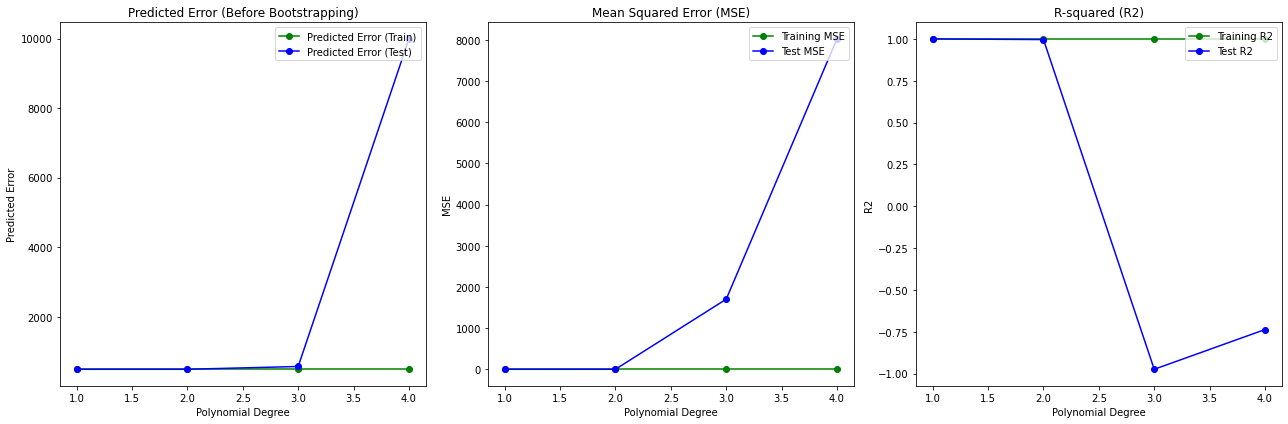

In [171]:
#Attempt to implement bias-variance tradeoff before bootstrapping with topographical data and OLS:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 5)

# Initialize lists to store predicted error values before bootstrapping
predicted_error_train_before = []
predicted_error_test_before = []

# Initialize lists to store MSE and R2 values after bootstrapping
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Perform bias-variance tradeoff analysis before bootstrapping
for degree in degree_range:
    # Create polynomial features for the current degree
    X_train_poly = np.hstack([terrain_train**i for i in range(1, degree + 1)])
    X_test_poly = np.hstack([terrain_test**i for i in range(1, degree + 1)])

    # Create an instance of the LinearRegression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_poly, terrain_train)

    # Make predictions on the training data
    train_pred = model.predict(X_train_poly)

    # Make predictions on the test data
    test_pred = model.predict(X_test_poly)

    # Calculate bias^2 for the current degree on training and test data
    bias_squared_train = np.mean((terrain_train - train_pred)**2)
    bias_squared_test = np.mean((terrain_test - test_pred)**2)

    # Calculate variance for the current degree on training and test data
    variance_train = np.mean((train_pred - np.mean(train_pred))**2)
    variance_test = np.mean((test_pred - np.mean(train_pred))**2)

    # Calculate predicted error as the sum of bias^2 and variance on training and test data
    predicted_error_train = bias_squared_train + variance_train
    predicted_error_test = bias_squared_test + variance_test

    predicted_error_train_before.append(predicted_error_train)
    predicted_error_test_before.append(predicted_error_test)

# Perform bootstrap resampling for each degree and calculate MSE and R2
n_bootstrap = 10  # Number of bootstrap iterations (you can adjust this)

# Precompute polynomial features for test data (outside the loop)
X_test_poly_test = [np.hstack([terrain_test**i for i in range(1, degree + 1)]) for degree in degree_range]

for degree in degree_range:
    mse_train_bootstrap = []
    mse_test_bootstrap = []
    r2_train_bootstrap = []
    r2_test_bootstrap = []

    for _ in range(n_bootstrap):
        # Resample with replacement from the training data
        terrain_train_sampled = resample(terrain_train, random_state=np.random.randint(0, 1000))

        # Create polynomial features for the current degree
        X_train_poly = np.hstack([terrain_train_sampled**i for i in range(1, degree + 1)])

        # Create an instance of the LinearRegression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(X_train_poly, terrain_train_sampled)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Use precomputed test data features
        test_pred = model.predict(X_test_poly_test[degree - 1])

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(terrain_train_sampled, train_pred)
        mse_test = mean_squared_error(terrain_test, test_pred)

        # Calculate R2 for training and test data
        r2_train = r2_score(terrain_train_sampled, train_pred)
        r2_test = r2_score(terrain_test, test_pred)

        mse_train_bootstrap.append(mse_train)
        mse_test_bootstrap.append(mse_test)
        r2_train_bootstrap.append(r2_train)
        r2_test_bootstrap.append(r2_test)

    # Calculate the mean of MSE and R2 values from bootstrap samples
    mean_mse_train = np.mean(mse_train_bootstrap)
    mean_mse_test = np.mean(mse_test_bootstrap)
    mean_r2_train = np.mean(r2_train_bootstrap)
    mean_r2_test = np.mean(r2_test_bootstrap)

    mse_train_list.append(mean_mse_train)
    mse_test_list.append(mean_mse_test)
    r2_train_list.append(mean_r2_train)
    r2_test_list.append(mean_r2_test)
# Plot predicted error before bootstrapping, MSE, and R2 as functions of polynomial degree
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Predicted Error (Before Bootstrapping)')
plt.plot(degree_range, predicted_error_train_before, 'go-', label='Predicted Error (Train)')
plt.plot(degree_range, predicted_error_test_before, 'bo-', label='Predicted Error (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predicted Error')
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.title('Mean Squared Error (MSE)')
plt.plot(degree_range, mse_train_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
plt.title('R-squared (R2)')
plt.plot(degree_range, r2_train_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

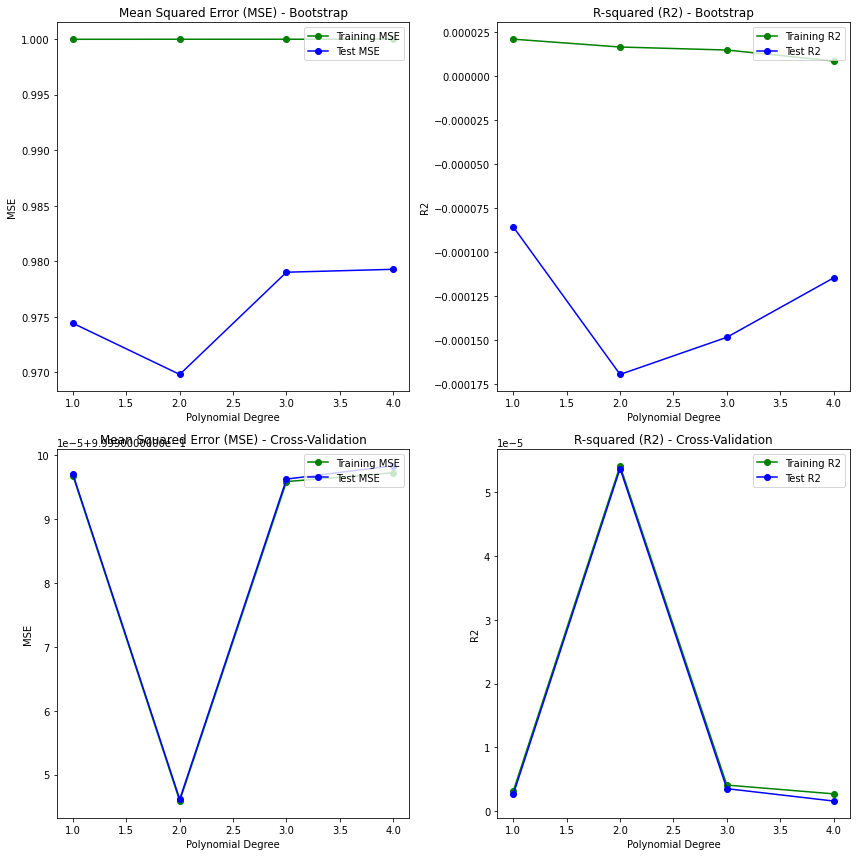

In [114]:
#Topographical OLS w. Bootstrapping and Cross-Validation(across k-folds):
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 5)

# Initialize lists to store MSE and R2 values for bootstrap and cross-validation
mse_train_bootstrap_list = []
mse_test_bootstrap_list = []
r2_train_bootstrap_list = []
r2_test_bootstrap_list = []

mse_train_cv_list = []
mse_test_cv_list = []
r2_train_cv_list = []
r2_test_cv_list = []

# Perform both bootstrap resampling and k-fold cross-validation for each degree
n_bootstrap = 20  # Number of bootstrap iterations
n_folds = 5  # Number of folds for cross-validation

for degree in degree_range:
    mse_train_bootstrap = []
    mse_test_bootstrap = []
    r2_train_bootstrap = []
    r2_test_bootstrap = []
    
    mse_train_cv = []
    mse_test_cv = []
    r2_train_cv = []
    r2_test_cv = []

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    for _ in range(n_bootstrap):
        # Resample with replacement from the training data
        terrain_train_sampled = resample(terrain_train, random_state=np.random.randint(0, 1000))

        # Scale the sampled data using StandardScaler
        scaler = StandardScaler()
        terrain_train_sampled_scaled = scaler.fit_transform(terrain_train_sampled.reshape(-1, 1))
        terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))

        # Flatten the sampled data for regression
        X_train = np.arange(len(terrain_train_sampled_scaled)).reshape(-1, 1)
        y_train = terrain_train_sampled_scaled.ravel()
        X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
        y_test = terrain_test_scaled.ravel()

        # Create polynomial features for the current degree
        X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
        X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

        # Create an instance of the LinearRegression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(X_train_poly, y_train)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Make predictions on the test data
        test_pred = model.predict(X_test_poly)

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)

        # Calculate R2 for training and test data
        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        mse_train_bootstrap.append(mse_train)
        mse_test_bootstrap.append(mse_test)
        r2_train_bootstrap.append(r2_train)
        r2_test_bootstrap.append(r2_test)

    # Calculate the mean of MSE and R2 values from bootstrap samples
    mean_mse_train_bootstrap = np.mean(mse_train_bootstrap)
    mean_mse_test_bootstrap = np.mean(mse_test_bootstrap)
    mean_r2_train_bootstrap = np.mean(r2_train_bootstrap)
    mean_r2_test_bootstrap = np.mean(r2_test_bootstrap)

    mse_train_bootstrap_list.append(mean_mse_train_bootstrap)
    mse_test_bootstrap_list.append(mean_mse_test_bootstrap)
    r2_train_bootstrap_list.append(mean_r2_train_bootstrap)
    r2_test_bootstrap_list.append(mean_r2_test_bootstrap)

    # Perform k-fold cross-validation to find optimal parameters
    mse_train_fold_cv = []
    mse_test_fold_cv = []
    r2_train_fold_cv = []
    r2_test_fold_cv = []

    for train_index, test_index in kf.split(X_train_poly):
        X_train_cv, X_test_cv = X_train_poly[train_index], X_train_poly[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        # Create an instance of the LinearRegression model
        model = LinearRegression()

        # Fit the model to the training data for cross-validation
        model.fit(X_train_cv, y_train_cv)

        # Make predictions on the training and test data
        train_pred_cv = model.predict(X_train_cv)
        test_pred_cv = model.predict(X_test_cv)

        # Calculate MSE for training and test data in cross-validation
        mse_train_fold = mean_squared_error(y_train_cv, train_pred_cv)
        mse_test_fold = mean_squared_error(y_test_cv, test_pred_cv)

        # Calculate R2 for training and test data in cross-validation
        r2_train_fold = r2_score(y_train_cv, train_pred_cv)
        r2_test_fold = r2_score(y_test_cv, test_pred_cv)

        mse_train_fold_cv.append(mse_train_fold)
        mse_test_fold_cv.append(mse_test_fold)
        r2_train_fold_cv.append(r2_train_fold)
        r2_test_fold_cv.append(r2_test_fold)

    # Calculate the mean of MSE and R2 values from cross-validation folds
    mean_mse_train_cv = np.mean(mse_train_fold_cv)
    mean_mse_test_cv = np.mean(mse_test_fold_cv)
    mean_r2_train_cv = np.mean(r2_train_fold_cv)
    mean_r2_test_cv = np.mean(r2_test_fold_cv)

    mse_train_cv_list.append(mean_mse_train_cv)
    mse_test_cv_list.append(mean_mse_test_cv)
    r2_train_cv_list.append(mean_r2_train_cv)
    r2_test_cv_list.append(mean_r2_test_cv)

# Plot MSE and R2 for bootstrap and cross-validation as functions of polynomial degree
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error (MSE) - Bootstrap')
plt.plot(degree_range, mse_train_bootstrap_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_bootstrap_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.title('R-squared (R2) - Bootstrap')
plt.plot(degree_range, r2_train_bootstrap_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_bootstrap_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.title('Mean Squared Error (MSE) - Cross-Validation')
plt.plot(degree_range, mse_train_cv_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_cv_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.title('R-squared (R2) - Cross-Validation')
plt.plot(degree_range, r2_train_cv_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_cv_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

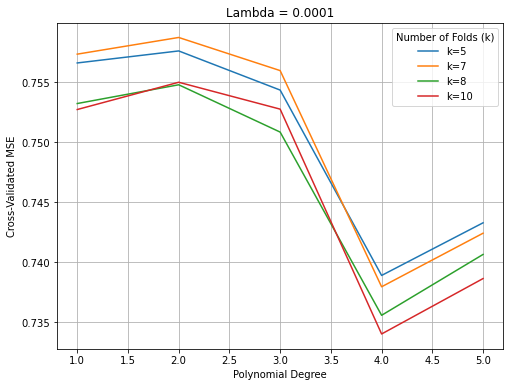

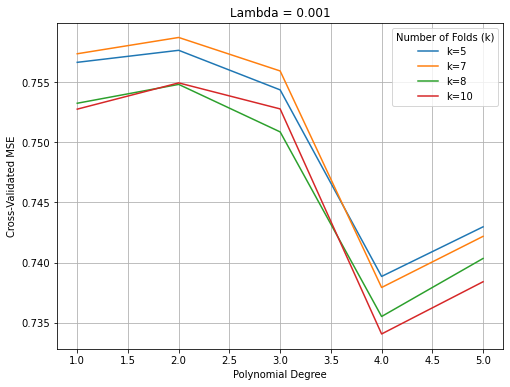

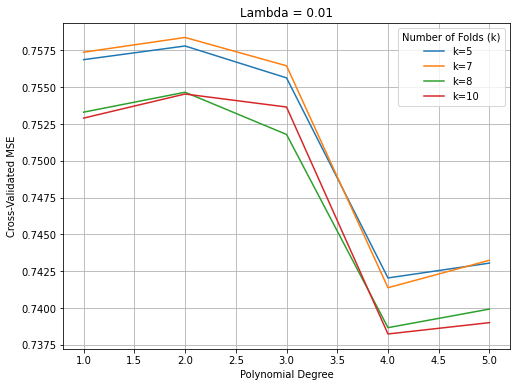

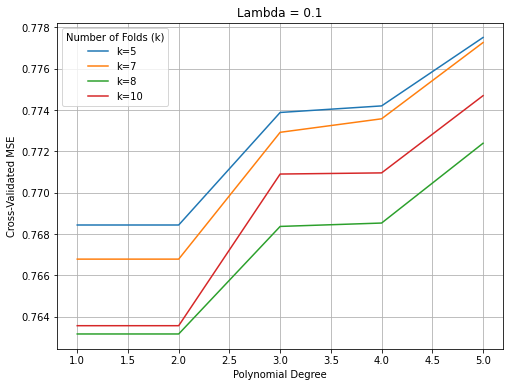

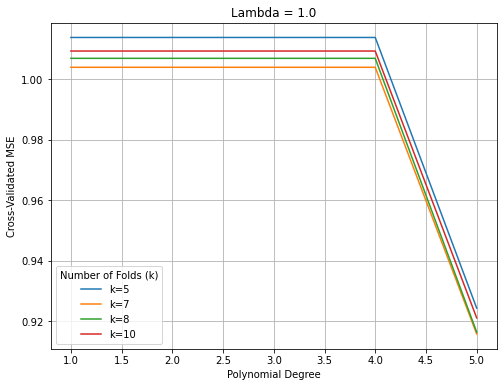

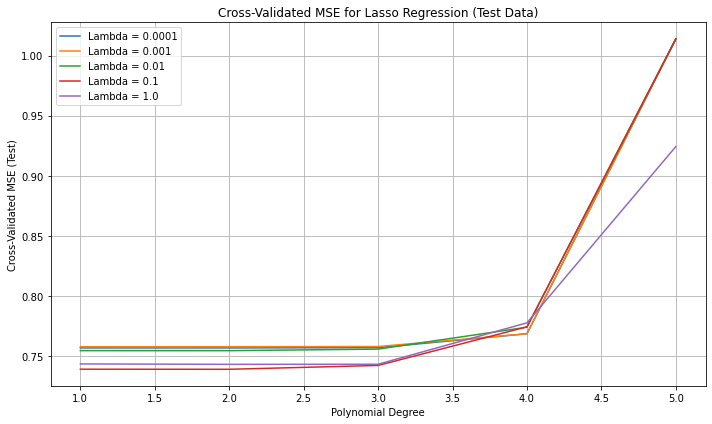

In [112]:
#Cross-validation for Lasso w. Franke Function for different k-folds:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, make_scorer

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4

# Generate data using the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y)

# Flatten the 2D arrays for data splitting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
degree_range = range(1, 6)

# Define a range of k values to test
k_values = [5, 7, 8, 10]

# Initialize a dictionary to store MSE values for each k and lambda combination
mse_dict = {k: {lambda_val: [] for lambda_val in lambda_values} for k in k_values}

# Perform Lasso regression with cross-validation for different k values
for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for degree in degree_range:
        for lambda_val in lambda_values:
            # Create polynomial features for the current degree
            X_train = np.ones_like(x_train_scaled)
            X_test = np.ones_like(x_test_scaled)
            
            for d in range(1, degree + 1):
                X_train = np.hstack((X_train, x_train_scaled**d))
                X_test = np.hstack((X_test, x_test_scaled**d))
            
            # Fit Lasso regression model with the current lambda using k-fold cross-validation
            lasso = Lasso(alpha=lambda_val, max_iter=10000)
            mse_test_cv = -cross_val_score(lasso, X_train, z_train_scaled, cv=cv, scoring='neg_mean_squared_error').mean()
            
            # Store the MSE for the current combination of k and lambda
            mse_dict[k][lambda_val].append(mse_test_cv)

# Plot the cross-validated MSE as a function of k for each lambda
for lambda_val in lambda_values:
    plt.figure(figsize=(8, 6))
    for k in k_values:
        mse_values = mse_dict[k][lambda_val]
        plt.plot(degree_range, mse_values, label=f'k={k}')
    
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Cross-Validated MSE')
    plt.title(f'Lambda = {lambda_val}')
    plt.legend(title='Number of Folds (k)')
    plt.grid(True)
# Initialize a list to store MSE values for each lambda
mse_test_cv_list = []

# Perform Lasso regression with cross-validation for different lambda values
for degree in degree_range:
    for lambda_val in lambda_values:
        # Create polynomial features for the current degree
        X_train = np.ones_like(x_train_scaled)
        X_test = np.ones_like(x_test_scaled)

        for d in range(1, degree + 1):
            X_train = np.hstack((X_train, x_train_scaled**d))
            X_test = np.hstack((X_test, x_test_scaled**d))

        # Fit Lasso regression model with the current lambda using 5-fold cross-validation
        lasso = Lasso(alpha=lambda_val, max_iter=10000)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_test_cv = -cross_val_score(lasso, X_train, z_train_scaled, cv=cv, scoring='neg_mean_squared_error').mean()

        mse_test_cv_list.append(mse_test_cv)

# Plot cross-validated MSE as a function of polynomial degree
plt.figure(figsize=(10, 6))
for i, lambda_val in enumerate(lambda_values):
    plt.plot(degree_range, mse_test_cv_list[i * len(degree_range):(i + 1) * len(degree_range)], label=f'Lambda = {lambda_val}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validated MSE (Test)')
plt.title('Cross-Validated MSE for Lasso Regression (Test Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Here, I've used the validation set to find the optimal parameters for this particular set of parameters/data. 
#There is a looping over the lambda-parameters, and then it finds where the training block begins
#And where the test block begins. #cross_val_score is used to return an array containing the estimation.
#Here, as the polynomial degree increases, the MSE increases across all lambda-values. But for the first
#3 polynomial degrees, its very consistent around 0.75. After the 3rd degree-polynomial it gradually
#increases to around 0.78 for the 4th-degree and takes off rapidly to around 1 for the 5th-degree.
#For lambda=1, the 5th-degree polynomial gives an MSE of 0.92, showing that higher regularization
#strength drives the coefficient down to 0 (Consistent with earlier findins that it mitigates
#the prevalent effect).

#I've run across numbers of k-folds to understand whether the results are independent of number of folds, k.
#The results are not completely independent of the no. of folds. I see that as the no. of folds increase,
#the MSE becomes closer to 0 for the lambda-values 0.0001, 0.001, and 0.01. As for lambda=0.1, the opposite was the case,
#and for lambda=1, the no. of folds produced random results, and didnt have any relation to the MSE. So,
#the higher regularization strength cancels out the effect of the increased no. of folds.


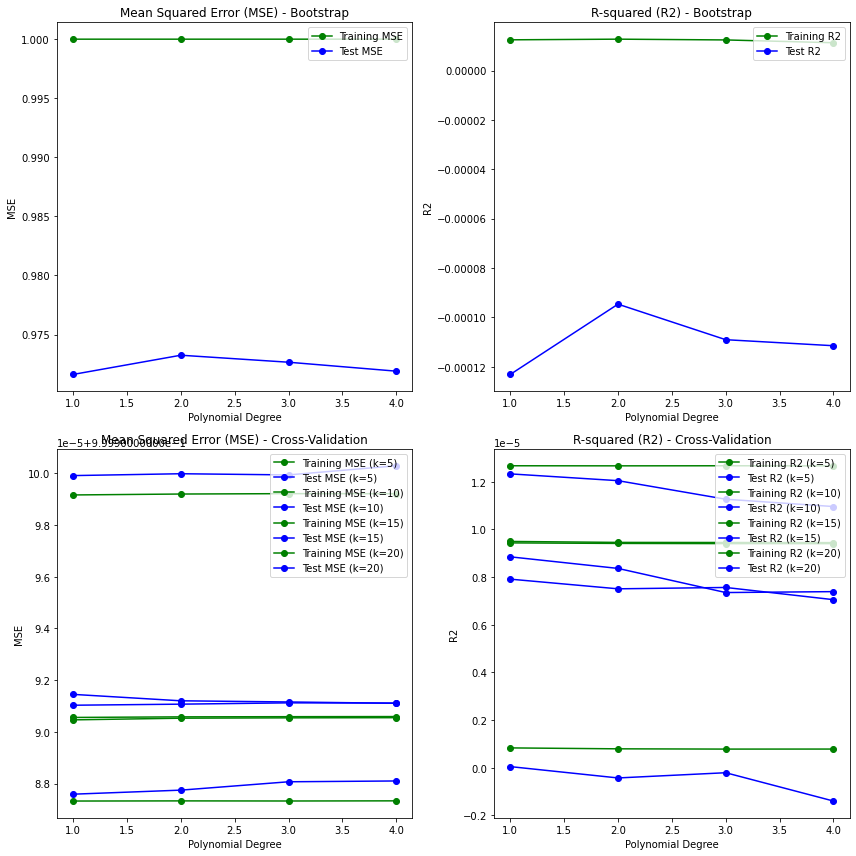

In [115]:
#Cross-validation for Ridge regression on topographical data: 
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees
degree_range = range(1, 5)

# Initialize lists to store MSE and R2 values for bootstrap
mse_train_bootstrap_list = []
mse_test_bootstrap_list = []
r2_train_bootstrap_list = []
r2_test_bootstrap_list = []

# Initialize lists to store MSE and R2 values for cross-validation for different k values
mse_train_cv_lists = [[] for _ in degree_range]
mse_test_cv_lists = [[] for _ in degree_range]
r2_train_cv_lists = [[] for _ in degree_range]
r2_test_cv_lists = [[] for _ in degree_range]

# Perform bootstrap resampling and k-fold cross-validation for each degree
n_bootstrap = 20  # Number of bootstrap iterations
k_values = [5, 7, 8, 10]  # Different values of k

for degree in degree_range:
    mse_train_bootstrap = []
    mse_test_bootstrap = []
    r2_train_bootstrap = []
    r2_test_bootstrap = []

    kf = KFold(n_splits=max(k_values), shuffle=True, random_state=42)

    for _ in range(n_bootstrap):
        # Resample with replacement from the training data
        terrain_train_sampled = resample(terrain_train, random_state=np.random.randint(0, 1000))

        # Scale the sampled data using StandardScaler
        scaler = StandardScaler()
        terrain_train_sampled_scaled = scaler.fit_transform(terrain_train_sampled.reshape(-1, 1))
        terrain_test_scaled = scaler.transform(terrain_test.reshape(-1, 1))

        # Flatten the sampled data for regression
        X_train = np.arange(len(terrain_train_sampled_scaled)).reshape(-1, 1)
        y_train = terrain_train_sampled_scaled.ravel()
        X_test = np.arange(len(terrain_test_scaled)).reshape(-1, 1)
        y_test = terrain_test_scaled.ravel()

        # Create polynomial features for the current degree
        X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
        X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

        # Create an instance of the LinearRegression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(X_train_poly, y_train)

        # Make predictions on the training data
        train_pred = model.predict(X_train_poly)

        # Make predictions on the test data
        test_pred = model.predict(X_test_poly)

        # Calculate MSE for training and test data
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)

        # Calculate R2 for training and test data
        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        mse_train_bootstrap.append(mse_train)
        mse_test_bootstrap.append(mse_test)
        r2_train_bootstrap.append(r2_train)
        r2_test_bootstrap.append(r2_test)

    # Calculate the mean of MSE and R2 values from bootstrap samples
    mean_mse_train_bootstrap = np.mean(mse_train_bootstrap)
    mean_mse_test_bootstrap = np.mean(mse_test_bootstrap)
    mean_r2_train_bootstrap = np.mean(r2_train_bootstrap)
    mean_r2_test_bootstrap = np.mean(r2_test_bootstrap)

    mse_train_bootstrap_list.append(mean_mse_train_bootstrap)
    mse_test_bootstrap_list.append(mean_mse_test_bootstrap)
    r2_train_bootstrap_list.append(mean_r2_train_bootstrap)
    r2_test_bootstrap_list.append(mean_r2_test_bootstrap)

    # Perform k-fold cross-validation for different k values
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        mse_train_cv = []
        mse_test_cv = []
        r2_train_cv = []
        r2_test_cv = []

        for train_index, test_index in kf.split(X_train_poly):
            X_train_cv, X_test_cv = X_train_poly[train_index], X_train_poly[test_index]
            y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

            # Create an instance of the LinearRegression model
            model = LinearRegression()

            # Fit the model to the training data for cross-validation
            model.fit(X_train_cv, y_train_cv)

            # Make predictions on the training and test data
            train_pred_cv = model.predict(X_train_cv)
            test_pred_cv = model.predict(X_test_cv)

            # Calculate MSE for training and test data in cross-validation
            mse_train_fold = mean_squared_error(y_train_cv, train_pred_cv)
            mse_test_fold = mean_squared_error(y_test_cv, test_pred_cv)

            # Calculate R2 for training and test data in cross-validation
            r2_train_fold = r2_score(y_train_cv, train_pred_cv)
            r2_test_fold = r2_score(y_test_cv, test_pred_cv)

            mse_train_cv.append(mse_train_fold)
            mse_test_cv.append(mse_test_fold)
            r2_train_cv.append(r2_train_fold)
            r2_test_cv.append(r2_test_fold)

        # Calculate the mean of MSE and R2 values from cross-validation folds
        mean_mse_train_cv = np.mean(mse_train_cv)
        mean_mse_test_cv = np.mean(mse_test_cv)
        mean_r2_train_cv = np.mean(r2_train_cv)
        mean_r2_test_cv = np.mean(r2_test_cv)

        mse_train_cv_lists[degree - 1].append(mean_mse_train_cv)
        mse_test_cv_lists[degree - 1].append(mean_mse_test_cv)
        r2_train_cv_lists[degree - 1].append(mean_r2_train_cv)
        r2_test_cv_lists[degree - 1].append(mean_r2_test_cv)

# Plot MSE and R2 for bootstrap and cross-validation as functions of polynomial degree and k
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error (MSE) - Bootstrap')
plt.plot(degree_range, mse_train_bootstrap_list, 'go-', label='Training MSE')
plt.plot(degree_range, mse_test_bootstrap_list, 'bo-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.title('R-squared (R2) - Bootstrap')
plt.plot(degree_range, r2_train_bootstrap_list, 'go-', label='Training R2')
plt.plot(degree_range, r2_test_bootstrap_list, 'bo-', label='Test R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.title('Mean Squared Error (MSE) - Cross-Validation')
for i, k in enumerate(k_values):
    plt.plot(degree_range, mse_train_cv_lists[i], 'go-', label=f'Training MSE (k={k})')
    plt.plot(degree_range, mse_test_cv_lists[i], 'bo-', label=f'Test MSE (k={k})')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.title('R-squared (R2) - Cross-Validation')
for i, k in enumerate(k_values):
    plt.plot(degree_range, r2_train_cv_lists[i], 'go-', label=f'Training R2 (k={k})')
    plt.plot(degree_range, r2_test_cv_lists[i], 'bo-', label=f'Test R2 (k={k})')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

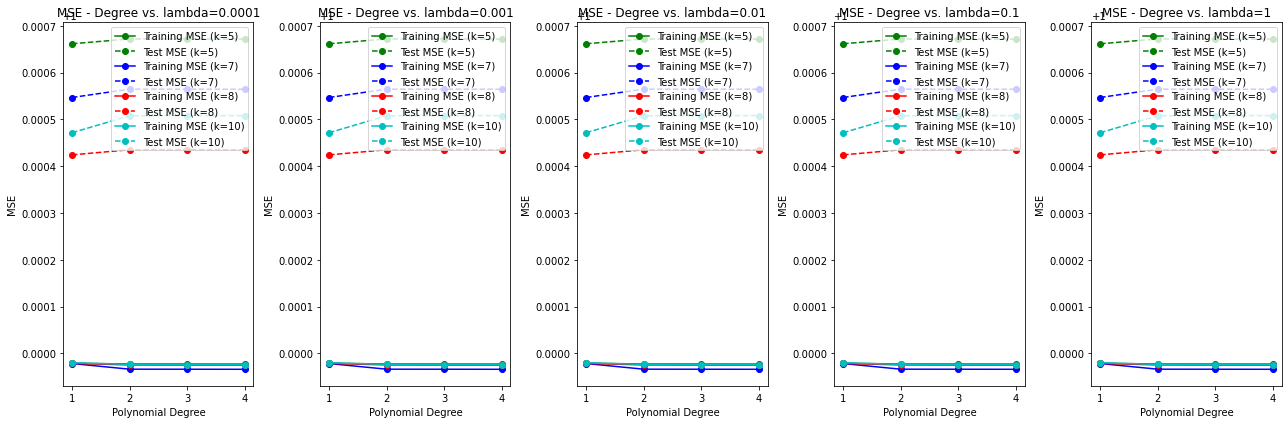

In [158]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees, lambda values, and k values
degree_range = range(1, 5)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
k_values = [5, 7, 8, 10]

# Initialize lists to store MSE values for cross-validation for different k and lambda values
mse_train_cv_lists = [[[] for _ in lambdas] for _ in k_values]
mse_test_cv_lists = [[[] for _ in lambdas] for _ in k_values]

# Define a list of colors for the plots
colors = ['g', 'b', 'r', 'c', 'm']

# Perform k-fold cross-validation for each degree, k, and lambda
n_bootstrap = 20  # Number of bootstrap iterations

for degree in degree_range:
    for k_idx, k in enumerate(k_values):
        for lambda_idx, lambda_val in enumerate(lambdas):
            mse_train_cv = []
            mse_test_cv = []

            kf = KFold(n_splits=k, shuffle=True, random_state=42)

            for train_index, test_index in kf.split(terrain_train):
                train_fold, test_fold = terrain_train[train_index], terrain_train[test_index]

                # Scale the data using StandardScaler
                scaler = StandardScaler()
                train_fold_scaled = scaler.fit_transform(train_fold.reshape(-1, 1))
                test_fold_scaled = scaler.transform(test_fold.reshape(-1, 1))

                # Flatten the data for regression
                X_train = np.arange(len(train_fold_scaled)).reshape(-1, 1)
                y_train = train_fold_scaled.ravel()
                X_test = np.arange(len(test_fold_scaled)).reshape(-1, 1)
                y_test = test_fold_scaled.ravel()

                # Create polynomial features for the current degree
                X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
                X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

                # Create an instance of the Ridge regression model with lambda
                model = Ridge(alpha=lambda_val)

                # Fit the model to the training data
                model.fit(X_train_poly, y_train)

                # Make predictions on the training and test data
                train_pred_cv = model.predict(X_train_poly)
                test_pred_cv = model.predict(X_test_poly)

                # Calculate MSE for training and test data in cross-validation
                mse_train_fold = mean_squared_error(y_train, train_pred_cv)
                mse_test_fold = mean_squared_error(y_test, test_pred_cv)

                mse_train_cv.append(mse_train_fold)
                mse_test_cv.append(mse_test_fold)

            # Calculate the mean of MSE values from cross-validation folds
            mean_mse_train_cv = np.mean(mse_train_cv)
            mean_mse_test_cv = np.mean(mse_test_cv)

            mse_train_cv_lists[k_idx][lambda_idx].append(mean_mse_train_cv)
            mse_test_cv_lists[k_idx][lambda_idx].append(mean_mse_test_cv)

# Create plots for MSE as a function of polynomial degree for each combination of k and lambda
plt.figure(figsize=(18, 6))  # Increase the width of the entire figure

for lambda_idx, lambda_val in enumerate(lambdas):
    plt.subplot(1, len(lambdas), lambda_idx + 1)
    plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots
    plt.title(f'MSE - Degree vs. lambda={lambda_val}')
    for k_idx, k in enumerate(k_values):
        plt.plot(degree_range, mse_train_cv_lists[k_idx][lambda_idx], colors[k_idx] + 'o-', label=f'Training MSE (k={k})')
        plt.plot(degree_range, mse_test_cv_lists[k_idx][lambda_idx], colors[k_idx] + 'o--', label=f'Test MSE (k={k})')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

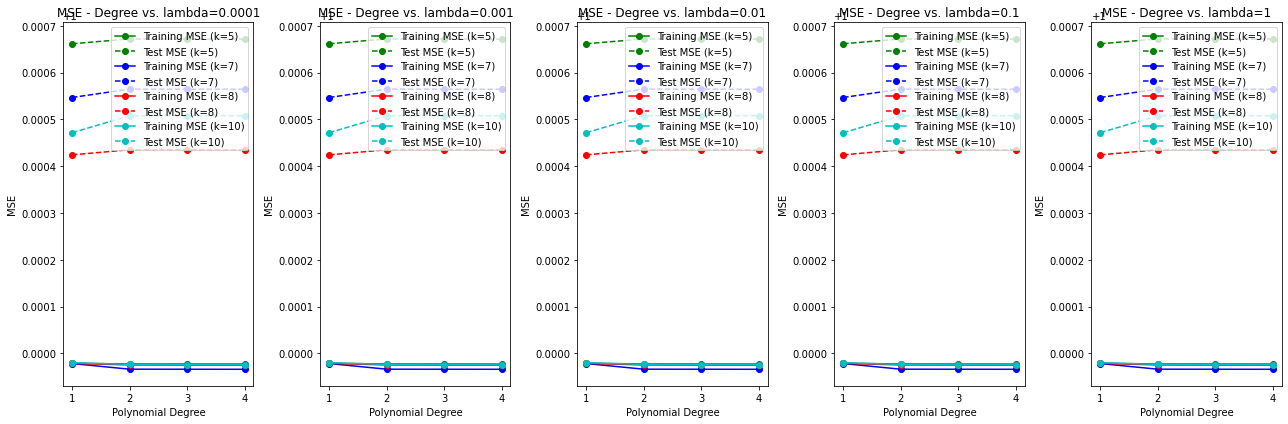

In [172]:
 import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso  # Import Lasso
from sklearn.metrics import mean_squared_error

# Load the terrain data
terrain_data = imread('n32_e034_1arc_v3.tif')

# Split the data into training and test sets (80% training, 20% testing)
terrain_train, terrain_test = train_test_split(terrain_data, test_size=0.2, random_state=42)

# Define a range of polynomial degrees, lambda values, and k values
degree_range = range(1, 5)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
k_values = [5, 7, 8, 10]

# Initialize lists to store MSE values for cross-validation for different k and lambda values
mse_train_cv_lists = [[[] for _ in lambdas] for _ in k_values]
mse_test_cv_lists = [[[] for _ in lambdas] for _ in k_values]

# Define a list of colors for the plots
colors = ['g', 'b', 'r', 'c', 'm']

# Perform k-fold cross-validation for each degree, k, and lambda
n_bootstrap = 20  # Number of bootstrap iterations

for degree in degree_range:
    for k_idx, k in enumerate(k_values):
        for lambda_idx, lambda_val in enumerate(lambdas):
            mse_train_cv = []
            mse_test_cv = []

            kf = KFold(n_splits=k, shuffle=True, random_state=42)

            for train_index, test_index in kf.split(terrain_train):
                train_fold, test_fold = terrain_train[train_index], terrain_train[test_index]

                # Scale the data using StandardScaler
                scaler = StandardScaler()
                train_fold_scaled = scaler.fit_transform(train_fold.reshape(-1, 1))
                test_fold_scaled = scaler.transform(test_fold.reshape(-1, 1))

                # Flatten the data for regression
                X_train = np.arange(len(train_fold_scaled)).reshape(-1, 1)
                y_train = train_fold_scaled.ravel()
                X_test = np.arange(len(test_fold_scaled)).reshape(-1, 1)
                y_test = test_fold_scaled.ravel()

                # Create polynomial features for the current degree
                X_train_poly = np.hstack([X_train**i for i in range(1, degree + 1)])
                X_test_poly = np.hstack([X_test**i for i in range(1, degree + 1)])

                # Create an instance of the Lasso regression model with lambda
                model = Lasso(alpha=lambda_val)

                # Fit the model to the training data
                model.fit(X_train_poly, y_train)

                # Make predictions on the training and test data
                train_pred_cv = model.predict(X_train_poly)
                test_pred_cv = model.predict(X_test_poly)

                # Calculate MSE for training and test data in cross-validation
                mse_train_fold = mean_squared_error(y_train, train_pred_cv)
                mse_test_fold = mean_squared_error(y_test, test_pred_cv)

                mse_train_cv.append(mse_train_fold)
                mse_test_cv.append(mse_test_fold)

            # Calculate the mean of MSE values from cross-validation folds
            mean_mse_train_cv = np.mean(mse_train_cv)
            mean_mse_test_cv = np.mean(mse_test_cv)

            mse_train_cv_lists[k_idx][lambda_idx].append(mean_mse_train_cv)
            mse_test_cv_lists[k_idx][lambda_idx].append(mean_mse_test_cv)

# Create plots for MSE as a function of polynomial degree for each combination of k and lambda
plt.figure(figsize=(18, 6))  # Increase the width of the entire figure

for lambda_idx, lambda_val in enumerate(lambdas):
    plt.subplot(1, len(lambdas), lambda_idx + 1)
    plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots
    plt.title(f'MSE - Degree vs. lambda={lambda_val}')
    for k_idx, k in enumerate(k_values):
        plt.plot(degree_range, mse_train_cv_lists[k_idx][lambda_idx], colors[k_idx] + 'o-', label=f'Training MSE (k={k})')
        plt.plot(degree_range, mse_test_cv_lists[k_idx][lambda_idx], colors[k_idx] + 'o--', label=f'Test MSE (k={k})')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()